### Project Brief

### Intro

In the past 15 years, the Bay Area Rapid Transit (BART) system, the mass transit system that joins San Francisco and Contra Costa County, has been subject to many factors of change; most notably, the rise in ridesharing apps, Uber and Lyft, as well as the Covid-10 pandemic and its impact on the way the public gathers. 

The purpose of this paper is to: (1) investigate overall trends in BART ridership leading up to the pandemic, (2) show the impact the pandemic has had on ridership, and (3) chart the commute patterns to SF Downtown, a hub of corporate activity. 

Although this paper is accessible to everyone, the primary audiences of this project are the BART Board of Directors, the SF Planning Commision, and the SF Downtown Merchant Association. 

#### BART Background

BART started service in 1972 and has grown to service 50 station across five counties. It joins San Francisco International Airport, Oakland International Airport, with San Francisco Downtown, and Oakland Downtown. Currently, BART operates from 5am-12am. 

Since BART is a civic project, it relies on regional and state funding to maintain the operational costs. The pandemic has impacted BART Riderships and they are currently relying on its $1.6 billion emergency federal funds to subsidize operational costs. More information on BART here. 

#### Project Scope and Methodology

The following analysis is based on a single dataset, procured from Kaggle. Its author is BART. The data tracks the bart ticket scans as a rider travels a trip. The rider scans at their origin station, and once again, at their destination station. The data summarizes the total trips per hour per unique combination of origin and destination station. 

The data encapsulates all rider data from January 1st, 2011 to May 31st, 2023. 


# BART RIDERSHIP in the past twelve years

In [5]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

#### 2011-2023s Ridership

In [7]:
#Importing files in a loop, cleaning, and appending them. 

bart_summary = []
for i in list(range(2011,2024,1)):
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    bart_summary.append(df.groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index())

In [8]:
trips_month = pd.concat(bart_summary)[['Year','Month Name','Month','Trip Count']].groupby(
    ['Year','Month','Month Name'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month'])#.reset_index()
trips_month['Date'] = trips_month['Month Name'] + " " + trips_month['Year'].astype(str)

In [9]:
#Trimmed dataset

trips_month #(total trips per month per year)

Year  Month Month Name  Trip Count           Date
0    2011      1    January     8203563   January 2011
1    2011      2   February     7933264  February 2011
2    2011      3      March     9049039     March 2011
3    2011      4      April     8824840     April 2011
4    2011      5        May     8940380       May 2011
..    ...    ...        ...         ...            ...
144  2023      1    January     3417241   January 2023
145  2023      2   February     3581426  February 2023
146  2023      3      March     4116038     March 2023
147  2023      4      April     4022389     April 2023
148  2023      5        May      314524       May 2023

[149 rows x 5 columns]

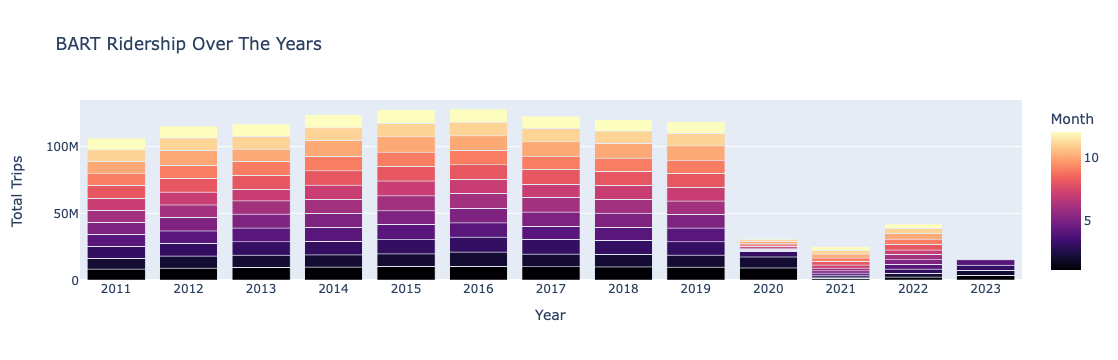

In [10]:
#Visualization: Bart 2011-2023 by Year (Months as colors)
trend = px.bar(trips_month, x='Year', 
             y='Trip Count', color = "Month", 
             labels={"Trip Count":"Total Trips"}, 
             title = "BART Ridership Over The Years",
             color_continuous_scale="Magma",
            )
trend.update_xaxes(type = 'category')
trend.show()
trend.write_image("images/2011_2023.png")
trend.write_image("images/2011_2023.svg")

In [11]:
#Added Stats pre-2020
pre2020_mean = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['mean']
pre2020_std = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['std']
total_2019 = trips_month[trips_month['Year']==2019].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2020 = trips_month[trips_month['Year']==2020].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2021 = trips_month[trips_month['Year']==2021].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2016 = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['max']
total_2022 = trips_month[trips_month['Year']==2022].groupby('Year')['Trip Count'].sum().describe().loc['mean']


print(bool(pre2020_mean-pre2020_std-total_2019 > 0)) #2019 within 1 std of the 2011-2019 sample. 
print('pre2020_mean ', str(pre2020_mean), '\npre2020_std ', str(pre2020_std),'\ntotal_2019 ',str(total_2019),
      '\ntotal_2020 ', str(total_2020),'\ntotal_2021 ',str(total_2021), '\n2021 / pre-2020 mean ', str(total_2021/pre2020_mean*100),
     '\n2021 by 2016(max)',str(total_2021/total_2016*100), '\ntotal_2016', str(total_2016), 
      '\n2019/2016',str((total_2016-total_2019)/total_2016), '\ntotal_2022', str(total_2022), 
      '\n2022/pre-2020 mean ', str(total_2022/pre2020_mean)
      )



False
pre2020_mean  120096302.77777778 
pre2020_std  6788835.11773612 
total_2019  118609605.0 
total_2020  31426279.0 
total_2021  24964402.0 
2021 / pre-2020 mean  20.786986295650838 
2021 by 2016(max) 19.471750765728462 
total_2016 128208307.0 
2019/2016 0.07486801927740923 
total_2022 41986747.0 
2022/pre-2020 mean  0.3496089890268386


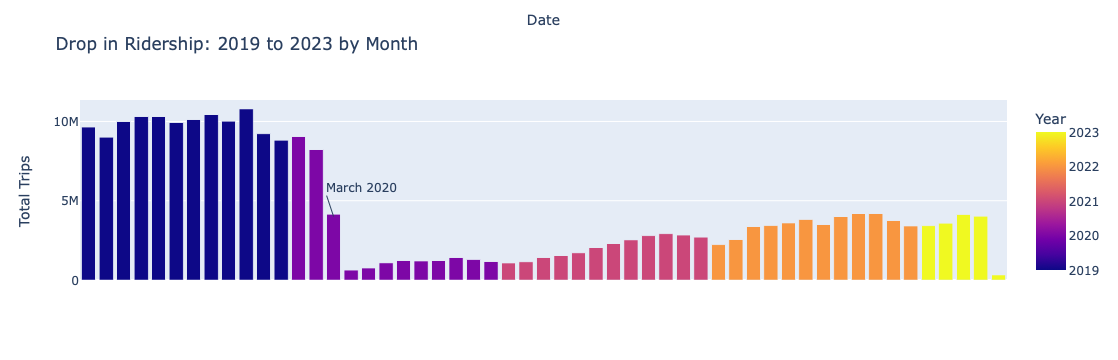

In [12]:
# Visualization: Bart 2019-2023 by Month

month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
             y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
             title = "Drop in Ridership: 2019 to 2023 by Month", color = 'Year')
month.update_xaxes(showticklabels=False)
month.add_annotation(
    x="March 2020", y = 4000000,
    text="March 2020",
    showarrow=True,
    xanchor="left")
month.show()
month.write_html("images/covid_drop.html")
month.write_image("images/covid_drop.png")
month.write_image("images/covid_drop.svg")

In [57]:
4/10.13

0.3948667324777887

#### Station Analysis

In [13]:
station_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    station_summary.append(df.groupby(['Year','Month Name','Month','Origin Station'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month']).reset_index().drop(columns = ['index']))


In [14]:
origin_stations = station_summary[0].merge(station_summary[1][station_summary[1]['Month']>4], 
                         how = 'left', left_on= ['Month','Origin Station'], right_on = ['Month','Origin Station'], 
                         suffixes = ['_2019','_2022'])
origin_stations = origin_stations.merge(station_summary[2][station_summary[2]['Month']<5], 
                         how = 'left', left_on= ['Month','Origin Station'], right_on = ['Month','Origin Station'], 
                         suffixes = ['_2019a','_2023'])
origin_stations
origin_stations.loc[origin_stations['Month'] < 5,'Trip Count_2022'] = origin_stations['Trip Count']
origin_stations = origin_stations[['Year_2019','Month Name_2019','Month','Origin Station','Trip Count_2019','Trip Count_2022']].rename(
    columns={"Year_2019":"Year", "Month Name_2019":"Month Name"})
origin_stations['ratio'] = origin_stations['Trip Count_2022']/origin_stations['Trip Count_2019']
origin_stations = origin_stations.drop(origin_stations[origin_stations['ratio']>1].index)
origin_stations = origin_stations.drop(columns = 'Year')
origin_stations['Type'] = 'Origin'
origin_stations = origin_stations.rename(columns = {'Origin Station':'Station'})
origin_stations

Month Name  Month Station  Trip Count_2019  Trip Count_2022     ratio  \
0      January      1    12TH           320839          99117.0  0.308931   
1      January      1    16TH           312552         123869.0  0.396315   
2      January      1    19TH           320299          96428.0  0.301056   
3      January      1    24TH           308336         121742.0  0.394836   
4      January      1    ANTC            68598          36593.0  0.533441   
..         ...    ...     ...              ...              ...       ...   
583   December     12    UCTY            97540          34366.0  0.352327   
584   December     12    WARM            91921          25831.0  0.281013   
585   December     12    WCRK           137955          52711.0  0.382088   
586   December     12    WDUB            73944          24203.0  0.327315   
587   December     12    WOAK           180965          77538.0  0.428470   

       Type  
0    Origin  
1    Origin  
2    Origin  
3    Origin  
4    Origin  
..      ...  
583  Origin  
584  Origin  
585  Origin  
586  Origin  
587  Origin  

[576 rows x 7 columns]

In [15]:
des_station_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    des_station_summary.append(df.groupby(['Year','Month Name','Month','Destination Station'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month']).reset_index().drop(columns = ['index']))


In [16]:
destination_stations = des_station_summary[0].merge(des_station_summary[1][des_station_summary[1]['Month']>4], 
                         how = 'left', left_on= ['Month','Destination Station'], right_on = ['Month','Destination Station'], 
                         suffixes = ['_2019','_2022'])
destination_stations = destination_stations.merge(des_station_summary[2][des_station_summary[2]['Month']<5], 
                         how = 'left', left_on= ['Month','Destination Station'], right_on = ['Month','Destination Station'], 
                         suffixes = ['_2019a','_2023'])
destination_stations.loc[destination_stations['Month'] < 5,'Trip Count_2022'] = destination_stations['Trip Count']
destination_stations = destination_stations[['Year_2019','Month Name_2019','Month','Destination Station','Trip Count_2019','Trip Count_2022']].rename(
    columns={"Year_2019":"Year", "Month Name_2019":"Month Name"})
destination_stations['ratio'] = destination_stations['Trip Count_2022']/destination_stations['Trip Count_2019']
destination_stations = destination_stations.drop(destination_stations[destination_stations['ratio']>1].index)
destination_stations['Type'] = 'Destination'
destination_stations = destination_stations.drop(columns = 'Year')
destination_stations = destination_stations.rename(columns = {'Destination Station':'Station'})
destination_stations

Month Name  Month Station  Trip Count_2019  Trip Count_2022     ratio  \
0      January      1    12TH           323829          96761.0  0.298803   
1      January      1    16TH           309847         124733.0  0.402563   
2      January      1    19TH           316884          93785.0  0.295960   
3      January      1    24TH           300699         121336.0  0.403513   
4      January      1    ANTC            70204          37726.0  0.537377   
..         ...    ...     ...              ...              ...       ...   
583   December     12    UCTY            92530          34026.0  0.367729   
584   December     12    WARM            89106          23745.0  0.266480   
585   December     12    WCRK           139927          52728.0  0.376825   
586   December     12    WDUB            76885          25064.0  0.325993   
587   December     12    WOAK           161451          70893.0  0.439099   

            Type  
0    Destination  
1    Destination  
2    Destination  
3    Destination  
4    Destination  
..           ...  
583  Destination  
584  Destination  
585  Destination  
586  Destination  
587  Destination  

[576 rows x 7 columns]

In [17]:
#Station Month DF
stations_month = pd.concat([origin_stations,destination_stations])
stations_month

Month Name  Month Station  Trip Count_2019  Trip Count_2022     ratio  \
0      January      1    12TH           320839          99117.0  0.308931   
1      January      1    16TH           312552         123869.0  0.396315   
2      January      1    19TH           320299          96428.0  0.301056   
3      January      1    24TH           308336         121742.0  0.394836   
4      January      1    ANTC            68598          36593.0  0.533441   
..         ...    ...     ...              ...              ...       ...   
583   December     12    UCTY            92530          34026.0  0.367729   
584   December     12    WARM            89106          23745.0  0.266480   
585   December     12    WCRK           139927          52728.0  0.376825   
586   December     12    WDUB            76885          25064.0  0.325993   
587   December     12    WOAK           161451          70893.0  0.439099   

            Type  
0         Origin  
1         Origin  
2         Origin  
3         Origin  
4         Origin  
..           ...  
583  Destination  
584  Destination  
585  Destination  
586  Destination  
587  Destination  

[1152 rows x 7 columns]

In [18]:
#Percentage share SF Downton s total
SF_downton = ['EMBR','MONT','POWL','CIVC']
stations_month[stations_month['Station'].isin(SF_downton)][['Trip Count_2019']].sum()/\
stations_month[['Trip Count_2019']].sum()

stations_month[stations_month['Station'].isin(SF_downton)][['Trip Count_2022']].sum()/\
stations_month[['Trip Count_2022']].sum()

Trip Count_2022    0.302088
dtype: float64

In [19]:
#Station Year DF - Total Trips for each station in the years
stations_year = stations_month.groupby('Station')[['Trip Count_2019','Trip Count_2022']].sum()
stations_year['Ratio'] =  stations_year['Trip Count_2022'] / stations_year['Trip Count_2019']*100
stations_year = stations_year.sort_values(by = 'Ratio', ascending = True)


In [20]:
stations_year = stations_year.reset_index()
stations_year['Type'] = 'Other Stations'
stations_year.loc[stations_year['Station'].isin(['SFIA','OAKL']),'Type'] = 'Airport'
stations_year.loc[stations_year['Station'].isin(['EMBR','POWL','CIVC','MONT']),'Type'] = 'SF Downtown'
stations_year

Station  Trip Count_2019  Trip Count_2022      Ratio            Type
0     WARM          2524326         651233.0  25.798292  Other Stations
1     MONT         23767969        6574494.0  27.661152     SF Downtown
2     PHIL          4184540        1223820.0  29.246225  Other Stations
3     NCON          1131763         339193.0  29.970321  Other Stations
4     FRMT          3278463        1007863.0  30.741936  Other Stations
5     WDUB          2013573         636785.0  31.624629  Other Stations
6     19TH          7657299        2438279.0  31.842547  Other Stations
7     DUBL          4754857        1517614.0  31.917132  Other Stations
8     MLBR          3574762        1143610.0  31.991221  Other Stations
9     12TH          7759318        2538672.0  32.717721  Other Stations
10    EMBR         24836028        8146204.0  32.799947     SF Downtown
11    ORIN          1737152         596241.0  34.322903  Other Stations
12    UCTY          2661559         921694.0  34.629854  Other Stations
13    COLM          2441543         877362.0  35.934735  Other Stations
14    WCRK          3695903        1355985.0  36.688869  Other Stations
15    ASHB          2934899        1080556.0  36.817485  Other Stations
16    CIVC         13792756        5110145.0  37.049485     SF Downtown
17    BALB          6163353        2287200.0  37.109671  Other Stations
18    SBRN          2102336         794578.0  37.795005  Other Stations
19    LAFY          1986769         754405.0  37.971450  Other Stations
20    SSAN          1918994         732585.0  38.175471  Other Stations
21    ROCK          3199428        1242263.0  38.827659  Other Stations
22    NBRK          2489377         969311.0  38.937895  Other Stations
23    CAST          1633460         636747.0  38.981487  Other Stations
24    GLEN          4321846        1697868.0  39.285713  Other Stations
25    MCAR          5062431        2017174.0  39.845955  Other Stations
26    PLZA          2790361        1123497.0  40.263500  Other Stations
27    COLS          3867701        1570703.0  40.610766  Other Stations
28    LAKE          4187419        1705250.0  40.723176  Other Stations
29    CONC          3192749        1306484.0  40.920348  Other Stations
30    16TH          7739460        3241623.0  41.884356  Other Stations
31    POWL         17355760        7270615.0  41.891654     SF Downtown
32    WOAK          4551175        1919848.0  42.183568  Other Stations
33    24TH          7334171        3111526.0  42.425054  Other Stations
34    DALY          5496463        2401435.0  43.690552  Other Stations
35    HAYW          2663387        1180784.0  44.333925  Other Stations
36    DELN          4521546        2009822.0  44.449885  Other Stations
37    SHAY          1720143         765531.0  44.503916  Other Stations
38    PITT          2223593         990205.0  44.531756  Other Stations
39    PCTR           688842         310819.0  45.121958  Other Stations
40    DBRK          6745753        3056504.0  45.310049  Other Stations
41    BAYF          3130709        1431222.0  45.715587  Other Stations
42    SANL          3568152        1666698.0  46.710398  Other Stations
43    FTVL          4599795        2170350.0  47.183624  Other Stations
44    RICH          2574283        1289107.0  50.076351  Other Stations
45    OAKL           851983         471601.0  55.353335         Airport
46    ANTC          1704347         978604.0  57.418120  Other Stations
47    SFIA          4085490        2449682.0  59.960543         Airport

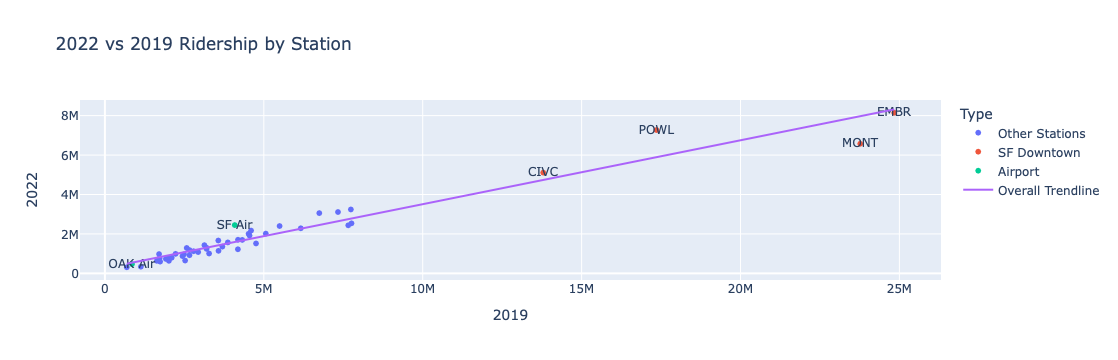

In [21]:
#Station Performance Snapshot

texts = [''] * 48
texts[10] = 'EMBR'
texts[1] = 'MONT'
texts[31] = 'POWL'
texts[16] = 'CIVC'
texts[47] = 'SF Air'
texts[45] = 'OAK Air'

ratio_scat = px.scatter(stations_year.reset_index(),
                         x="Trip Count_2019", 
                         y="Trip Count_2022",
                         labels={"Trip Count_2019":"2019","Trip Count_2022":"2022"},
                         trendline="ols", text = texts, color = 'Type', trendline_scope="overall",
                         hover_data=["Station"],
                         title = "2022 vs 2019 Ridership by Station")
ratio_scat.show()
ratio_scat.write_html("images/ratio_scat.html")
ratio_scat.write_image("images/ratio_scat.png")
ratio_scat.write_image("images/ratio_scat.svg")

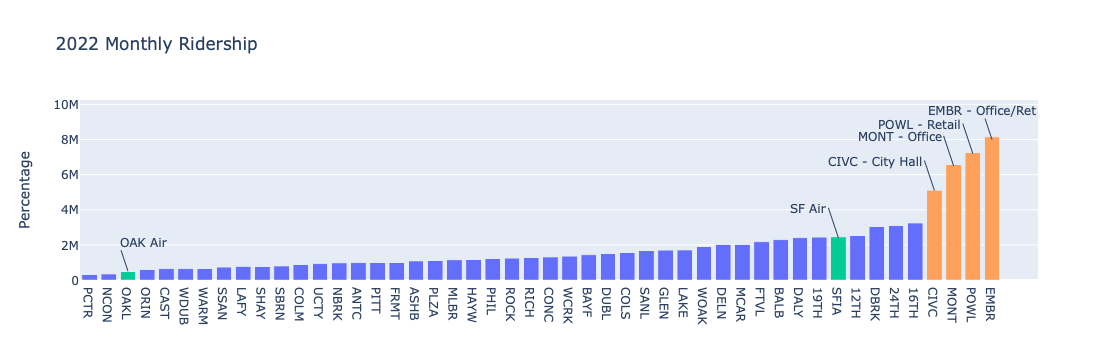

In [22]:
# STATION NUMBERS
colors = ['#636efa',] * 48
colors[47] = '#ffa15a'
colors[46] = '#ffa15a'
colors[45] = '#ffa15a'
colors[44] = '#ffa15a'
colors[2] = '#00cc96'
colors[39] = '#00cc96'

station_numbers = go.Figure(data=[go.Bar(
    x=stations_month.groupby('Station')['Trip Count_2022'].sum().reset_index().sort_values(by='Trip Count_2022')['Station'],
    y=stations_month.groupby('Station')['Trip Count_2022'].sum().reset_index().sort_values(by='Trip Count_2022')['Trip Count_2022'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
station_numbers.update_layout(title_text='2022 Monthly Ridership')
station_numbers.add_annotation(
    x="EMBR", y = 8000000,
    text="EMBR - Office/Ret",
    showarrow=True,
    xanchor="center")
station_numbers.add_annotation(
    x="POWL", y = 7200000,
    text="POWL - Retail",
    showarrow=True,
    xanchor="right")
station_numbers.add_annotation(
    x="MONT", y = 6500000,
    text="MONT - Office",
    showarrow=True,
    xanchor="right")
station_numbers.add_annotation(
    x="CIVC", y = 5100000,
    text="CIVC - City Hall",
    showarrow=True,
    xanchor="right")
station_numbers.add_annotation(
    x="SFIA", y = 2400000,
    text="SF Air",
    showarrow=True,
    xanchor="right")
station_numbers.add_annotation(
    x="OAKL", y = 500000,
    text="OAK Air",
    showarrow=True,
    xanchor="left")

station_numbers.update_yaxes(
        title_text = "Percentage",
      )
# station_numbers.write_html("images/station_numbers.html")
# station_numbers.write_image("images/station_numbers.png")
# station_numbers.write_image("images/station_numbers.svg")

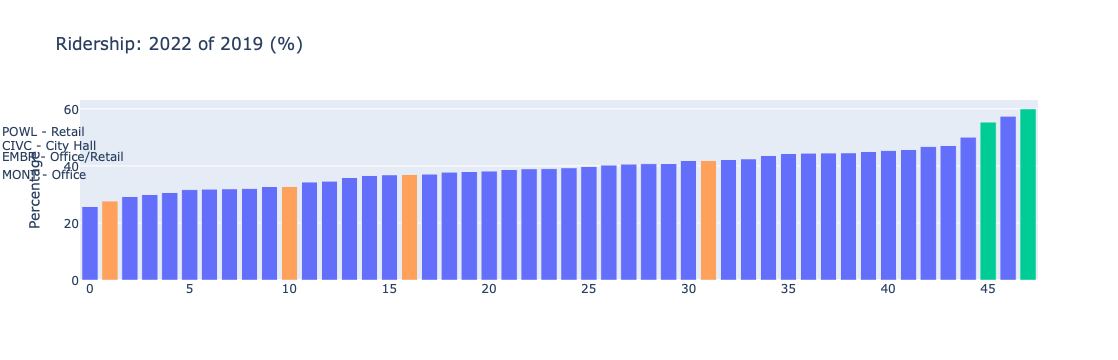

In [23]:
#STATION RATIO - NEEDS WORK
colors = ['#636efa',] * 48
colors[1] = '#ffa15a'
colors[10] = '#ffa15a'
colors[16] = '#ffa15a'
colors[31] = '#ffa15a'
colors[45] = '#00cc96'
colors[47] = '#00cc96'

station_ratio = go.Figure(data=[go.Bar(
    x=stations_year[['Ratio']].index,
    y=stations_year[['Ratio']]['Ratio'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
station_ratio.update_layout(title_text='Ridership: 2022 of 2019 (%)')
station_ratio.add_annotation(
    x="MONT", y = 27,
    text="MONT - Office",
    showarrow=True,
    xanchor="left")
station_ratio.add_annotation(
    x="EMBR", y = 33,
    text="EMBR - Office/Retail",
    showarrow=True,
    xanchor="center")
station_ratio.add_annotation(
    x="CIVC", y = 37,
    text="CIVC - City Hall",
    showarrow=True,
    xanchor="center")
station_ratio.add_annotation(
    x="POWL", y = 42,
    text="POWL - Retail",
    showarrow=True,
    xanchor="center")

station_ratio.update_yaxes(
        title_text = "Percentage",
      )
# station_ratio.write_html("images/station_ratio.html")
# station_ratio.write_image("images/station_ratio.png")
# station_ratio.write_image("images/station_ratio.svg")

### Downtown Daily

In [24]:
SF_stations = ['EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','DALY','COLM','SSAN','SBRN','SFIA','MLBR']

def SF(x):
    if x in SF_stations:
        return 1
    else:
        return 0

In [25]:
SF_downton = ['EMBR','MONT','POWL','CIVC']
downtown_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()
    df['Day Num'] = df['Date'].dt.dayofweek
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df = df[(df['Origin Station'].isin(SF_downton)) | (df['Destination Station'].isin(SF_downton))]
    df['Commute'] = df['Hour'].apply(lambda x: 'AM' if 4 < x <13 else 'PM')
    df['Origin_SF'] = df['Origin Station'].apply(SF)
    df['Destination_SF'] = df['Destination Station'].apply(SF)
    df['Transbay'] = df['Origin_SF'] + df['Destination_SF']
    df['Transbay'] = df['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')
    downtown_summary.append(df)

In [26]:
downtown_master = pd.concat([downtown_summary[0],downtown_summary[1][downtown_summary[1]['Month']>4], downtown_summary[2][downtown_summary[2]['Month']<5]])
downtown_master.loc[downtown_master['Year'].isin([2022,2023]),'Year']= '2022'
downtown_master.loc[downtown_master['Year']== 2019,'Year'] = '2019'

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_46705/3051134589.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2022' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



In [27]:
mont2 = downtown_master[((downtown_master['Destination Station']=='MONT') 
                 | (downtown_master['Origin Station']=='MONT')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
mont2['Station'] = 'MONT'
pow2 = downtown_master[((downtown_master['Destination Station']=='POWL') 
                 | (downtown_master['Origin Station']=='POWL')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
pow2['Station'] = 'POWL'
emb2 = downtown_master[((downtown_master['Destination Station']=='EMBR') 
                 | (downtown_master['Origin Station']=='EMBR')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
emb2['Station'] = 'EMBR'
civ2 = downtown_master[((downtown_master['Destination Station']=='CIVC') 
                 | (downtown_master['Origin Station']=='CIVC')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
civ2['Station'] = 'CIVC'
all2 = pd.concat([mont2,pow2,emb2,civ2])

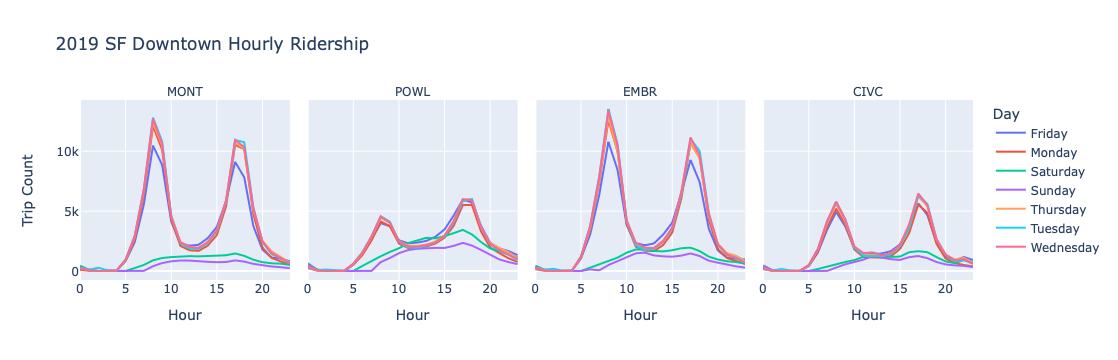

In [28]:
all_line2 = px.line(all2[all2['Year']=='2019'], x="Hour", y="Trip Count", color='Day', 
                    facet_col = 'Station', title = "2019 SF Downtown Hourly Ridership")
all_line2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line2.show()
all_line2.write_image("images/all_line2.png")
all_line2.write_html("images/all_line2.html")
all_line2.write_image("images/all_line2.svg")

In [29]:
10.4/12.8

0.8125

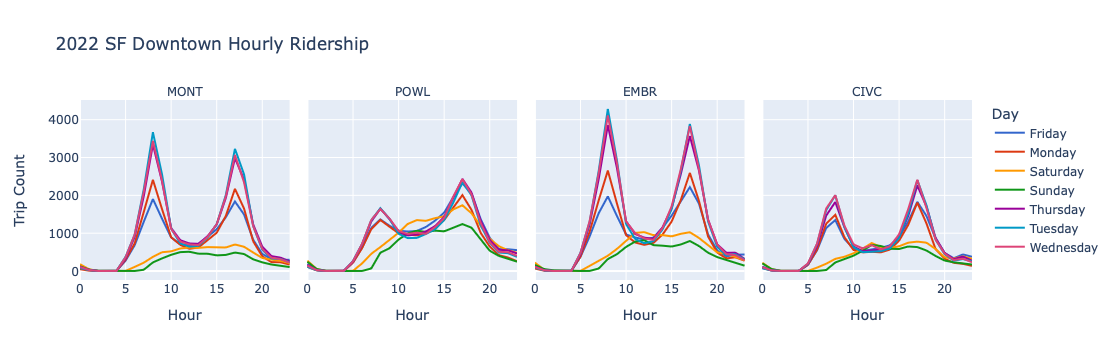

In [26]:
all_line3 = px.line(all2[all2['Year']=='2022'], x="Hour", y="Trip Count", 
                    color='Day', color_discrete_sequence=px.colors.qualitative.G10, facet_col = 'Station', title = "2022 SF Downtown Hourly Ridership")
all_line3.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line3.show()
all_line3.write_image("images/all_line3.png")
all_line3.write_html("images/all_line3.html")
all_line3.write_image("images/all_line3.svg")

In [56]:
all2[(all2['Year']=='2019') & (all2['Station'] == 'POWL')].groupby('Day')['Trip Count'].sum()/all2[(all2['Year']=='2019') & (all2['Station'] == 'POWL')].groupby('Day')['Trip Count'].sum().sum()

Day
Friday       0.169379
Monday       0.148423
Saturday     0.115088
Sunday       0.076422
Thursday     0.165366
Tuesday      0.161867
Wednesday    0.163456
Name: Trip Count, dtype: float64

In [49]:
all2[(all2['Year']=='2022') & (all2['Station'] == 'POWL')].groupby('Day')['Trip Count'].sum()/all2[(all2['Year']=='2022') & (all2['Station'] == 'POWL')].groupby('Day')['Trip Count'].sum().sum()

Day
Friday       0.160393
Monday       0.136536
Saturday     0.135738
Sunday       0.096581
Thursday     0.160190
Tuesday      0.152116
Wednesday    0.158446
Name: Trip Count, dtype: float64

In [50]:
all2[(all2['Year']=='2019') & (all2['Station'] == 'MONT')].groupby(
    'Day')['Trip Count'].sum()/all2[(all2['Year']=='2019') & (all2['Station'] == 'MONT')].groupby('Day')['Trip Count'].sum().sum()

Day
Friday       0.169106
Monday       0.180684
Saturday     0.039931
Sunday       0.023646
Thursday     0.194313
Tuesday      0.196480
Wednesday    0.195841
Name: Trip Count, dtype: float64

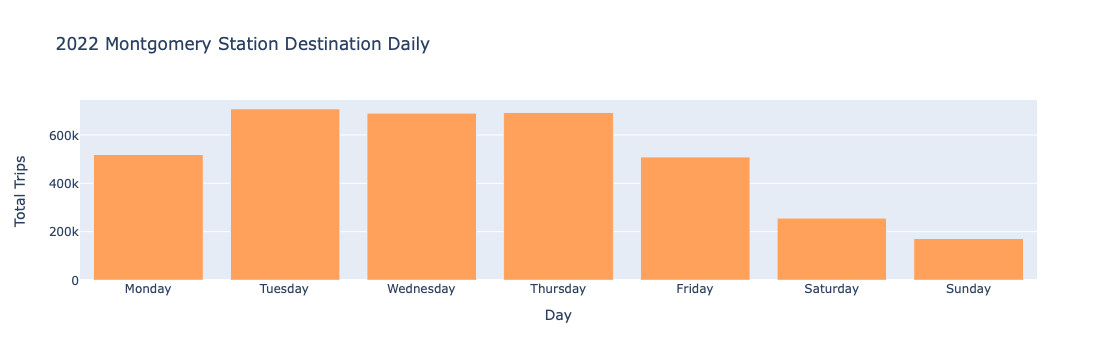

In [281]:
daily_mont22 = px.bar(downtown_master[(downtown_master['Destination Station']=='MONT') & (
    downtown_master['Year']=='2022')].groupby(
    ['Year','Day Num','Day'])['Trip Count'].sum().reset_index(), x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"}, 
             title = "2022 Montgomery Station Destination Daily",color_discrete_sequence=["#ffa15a"])
# daily_mont.update_xaxes(showticklabels=False)

daily_mont22.show()
daily_mont22.write_html("images/daily_mont22.html")
daily_mont22.write_image("images/daily_mont22.png")
daily_mont22.write_image("images/daily_mont22.svg")

# END OF WORK

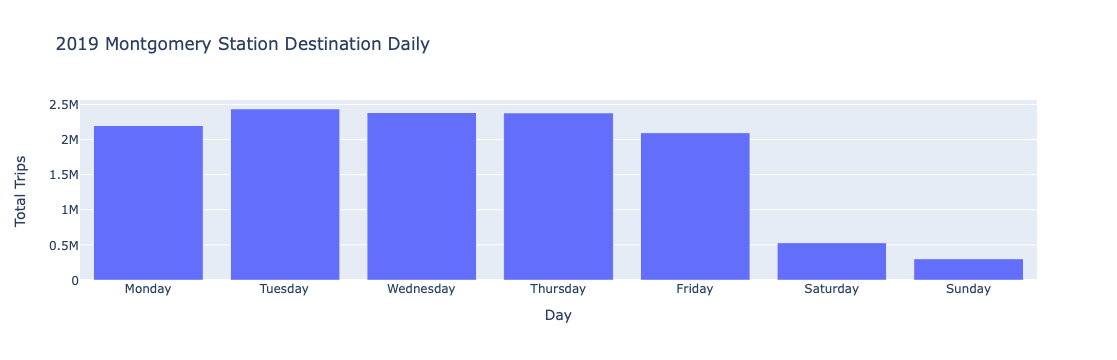

In [280]:
daily_mont19 = px.bar(downtown_master[(downtown_master['Destination Station']=='MONT') & (downtown_master['Year']=='2019')].groupby(['Year','Day Num','Day'])['Trip Count'].sum().reset_index(), x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"}, 
             title = "2019 Montgomery Station Destination Daily")
# daily_mont.update_xaxes(showticklabels=False)

daily_mont19.show()
daily_mont19.write_html("images/daily_mont19.html")
daily_mont19.write_image("images/daily_mont19.png")
daily_mont19.write_image("images/daily_mont19.svg")

In [287]:
downtown_master[downtown_master['Year']=='2022'].groupby(['Day Num','Day','Destination Station'])['Trip Count'].sum().reset_index()

Day Num     Day Destination Station  Trip Count
0          0  Monday                12TH       57987
1          0  Monday                16TH       65508
2          0  Monday                19TH       57487
3          0  Monday                24TH       93720
4          0  Monday                ANTC       32937
..       ...     ...                 ...         ...
345        6  Sunday                UCTY        7865
346        6  Sunday                WARM        4441
347        6  Sunday                WCRK       19631
348        6  Sunday                WDUB       10797
349        6  Sunday                WOAK       45275

[350 rows x 4 columns]

In [337]:
downtown_master[(downtown_master['Destination Station'].isin(SF_downton))].groupby(
    ['Year','Day Num','Day','Destination Station'])['Trip Count'].sum().reset_index()

Year  Day Num        Day Destination Station  Trip Count
0   2019        0     Monday                CIVC     1039484
1   2019        0     Monday                EMBR     2366667
2   2019        0     Monday                MONT     2199333
3   2019        0     Monday                POWL     1185522
4   2019        1    Tuesday                CIVC     1217565
5   2019        1    Tuesday                EMBR     2615691
6   2019        1    Tuesday                MONT     2434755
7   2019        1    Tuesday                POWL     1322651
8   2019        2  Wednesday                CIVC     1235134
9   2019        2  Wednesday                EMBR     2566135
10  2019        2  Wednesday                MONT     2381449
11  2019        2  Wednesday                POWL     1313022
12  2019        3   Thursday                CIVC     1198692
13  2019        3   Thursday                EMBR     2518561
14  2019        3   Thursday                MONT     2377694
15  2019        3   Thursday                POWL     1340081
16  2019        4     Friday                CIVC     1143645
17  2019        4     Friday                EMBR     2242021
18  2019        4     Friday                MONT     2094255
19  2019        4     Friday                POWL     1384331
20  2019        5   Saturday                CIVC      495379
21  2019        5   Saturday                EMBR      662119
22  2019        5   Saturday                MONT      528098
23  2019        5   Saturday                POWL      953486
24  2019        6     Sunday                CIVC      335486
25  2019        6     Sunday                EMBR      488948
26  2019        6     Sunday                MONT      299660
27  2019        6     Sunday                POWL      601537
28  2022        0     Monday                CIVC      342084
29  2022        0     Monday                EMBR      608385
30  2022        0     Monday                MONT      518290
31  2022        0     Monday                POWL      461929
32  2022        1    Tuesday                CIVC      432971
33  2022        1    Tuesday                EMBR      846825
34  2022        1    Tuesday                MONT      707417
35  2022        1    Tuesday                POWL      517350
36  2022        2  Wednesday                CIVC      452441
37  2022        2  Wednesday                EMBR      851414
38  2022        2  Wednesday                MONT      689983
39  2022        2  Wednesday                POWL      540704
40  2022        3   Thursday                CIVC      427227
41  2022        3   Thursday                EMBR      829226
42  2022        3   Thursday                MONT      693106
43  2022        3   Thursday                POWL      547549
44  2022        4     Friday                CIVC      387942
45  2022        4     Friday                EMBR      600411
46  2022        4     Friday                MONT      508528
47  2022        4     Friday                POWL      559018
48  2022        5   Saturday                CIVC      244202
49  2022        5   Saturday                EMBR      350689
50  2022        5   Saturday                MONT      255686
51  2022        5   Saturday                POWL      469426
52  2022        6     Sunday                CIVC      192260
53  2022        6     Sunday                EMBR      251173
54  2022        6     Sunday                MONT      172503
55  2022        6     Sunday                POWL      321508

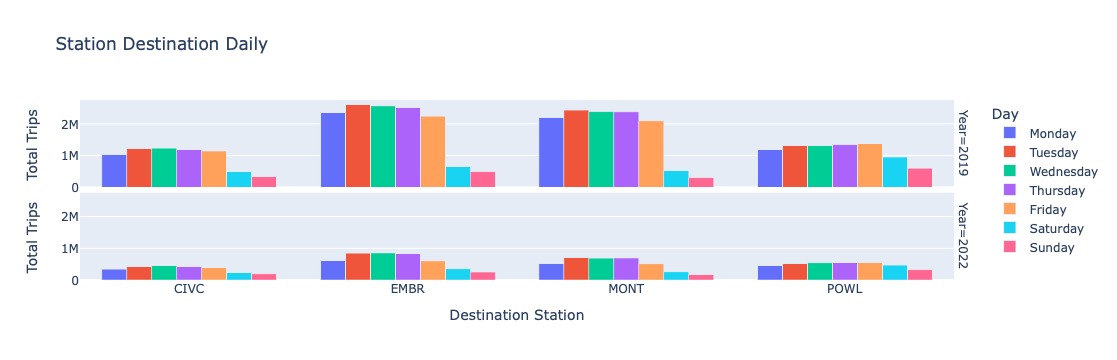

In [451]:
px.bar(downtown_master[(downtown_master['Destination Station'].isin(SF_downton))].groupby(
    ['Year','Day Num','Day','Destination Station'])['Trip Count'].sum().reset_index(), x = "Destination Station",
             y='Trip Count',labels={"Trip Count" : "Total Trips"}, color = 'Day', barmode = 'group',facet_row="Year",
             title = "Station Destination Daily")

In [569]:
downtown_master

Date  Hour Origin Station Destination Station  Trip Count  \
4       2019-01-01     0           12TH                CIVC           2   
10      2019-01-01     0           12TH                EMBR           7   
20      2019-01-01     0           12TH                POWL           5   
33      2019-01-01     0           16TH                CIVC          10   
40      2019-01-01     0           16TH                EMBR          22   
...            ...   ...            ...                 ...         ...   
2765259 2023-04-30    23           WCRK                POWL           1   
2765267 2023-04-30    23           WOAK                CIVC           4   
2765269 2023-04-30    23           WOAK                EMBR           1   
2765273 2023-04-30    23           WOAK                MONT           3   
2765275 2023-04-30    23           WOAK                POWL           1   

         Month      Day  Day Num Month Name  Year Commute  Origin_SF  \
4            1  Tuesday        1    January  2019      PM          0   
10           1  Tuesday        1    January  2019      PM          0   
20           1  Tuesday        1    January  2019      PM          0   
33           1  Tuesday        1    January  2019      PM          1   
40           1  Tuesday        1    January  2019      PM          1   
...        ...      ...      ...        ...   ...     ...        ...   
2765259      4   Sunday        6      April  2022      PM          0   
2765267      4   Sunday        6      April  2022      PM          0   
2765269      4   Sunday        6      April  2022      PM          0   
2765273      4   Sunday        6      April  2022      PM          0   
2765275      4   Sunday        6      April  2022      PM          0   

         Destination_SF Transbay  
4                     1        Y  
10                    1        Y  
20                    1        Y  
33                    1        N  
40                    1        N  
...                 ...      ...  
2765259               1        Y  
2765267               1        Y  
2765269               1        Y  
2765273               1        Y  
2765275               1        Y  

[4675284 rows x 14 columns]

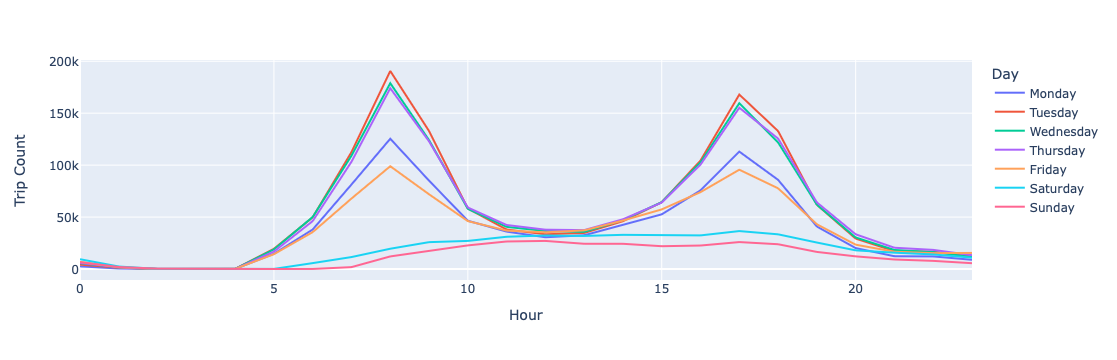

In [566]:
mont = downtown_master[((downtown_master['Destination Station']=='MONT') 
                 | (downtown_master['Origin Station']=='MONT')) 
                &  (downtown_master['Year']=='2022')].groupby(['Day Num','Day','Hour'])['Trip Count'].sum().reset_index()
mont_line = px.line(mont, x="Hour", y="Trip Count", color = 'Day')
mont_line.show()

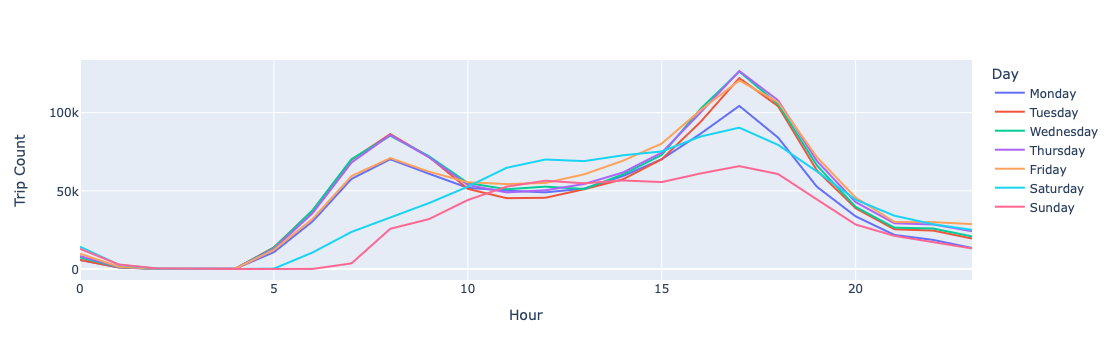

In [560]:
pow = downtown_master[((downtown_master['Destination Station']=='POWL') 
                 | (downtown_master['Origin Station']=='POWL')) 
                &  (downtown_master['Year']=='2022')].groupby(['Day Num','Day','Hour'])['Trip Count'].sum().reset_index()
pow_line = px.line(pow, x="Hour", y="Trip Count", color='Day')
pow_line.show()

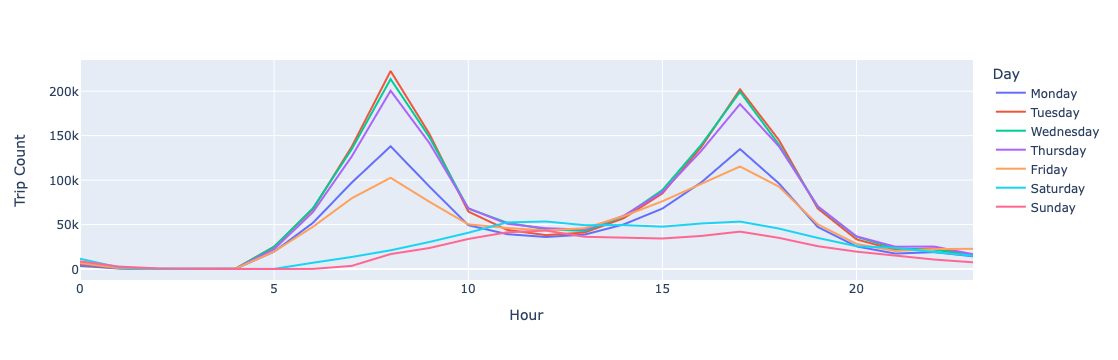

In [562]:
emb = downtown_master[((downtown_master['Destination Station']=='EMBR') 
                 | (downtown_master['Origin Station']=='EMBR')) 
                &  (downtown_master['Year']=='2022')].groupby(['Day Num','Day','Hour'])['Trip Count'].sum().reset_index()
emb_line = px.line(emb, x="Hour", y="Trip Count", color='Day')
emb_line.show()

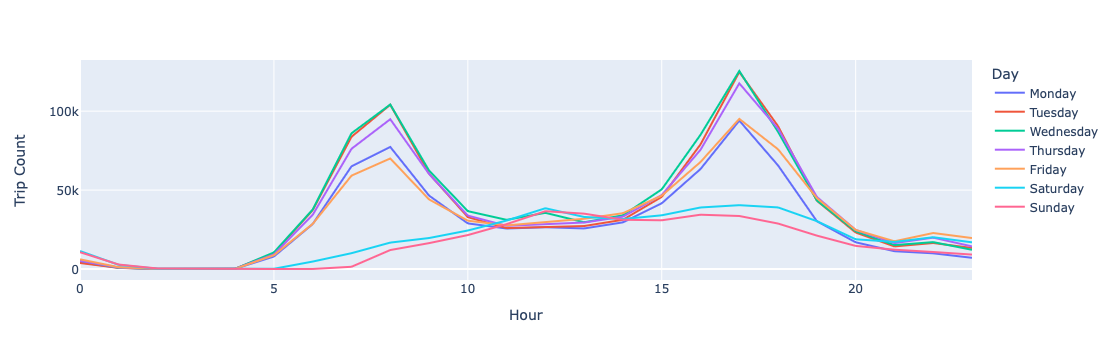

In [563]:
cvc = downtown_master[((downtown_master['Destination Station']=='CIVC') 
                 | (downtown_master['Origin Station']=='CIVC')) 
                &  (downtown_master['Year']=='2022')].groupby(['Day Num','Day','Hour'])['Trip Count'].sum().reset_index()
cvc_line = px.line(cvc, x="Hour", y="Trip Count", color='Day')
cvc_line.show()

In [106]:
cvc['Station'] = 'CIVC'
emb['Station'] = 'EMBR'
pow['Station'] = 'POWL'
mont['Station'] = 'MONT'
all = pd.concat([emb,mont,pow,cvc])
all_line = px.line(all2, x="Hour", y="Trip Count", color='Day', facet_row = 'Station', title = "SF Downtown Hourly Ridership")
all_line.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line.show()
all_line.write_image("images/all_line.png")
all_line.write_html("images/all_line.html")
all_line.write_image("images/all_line.svg")

NameError: name 'cvc' is not defined

In [144]:
yr_origin_stations.describe()

Trip Count_2019  Trip Count_2022      Ratio
count     4.800000e+01     4.800000e+01  48.000000
mean      2.471020e+06     9.346343e+05   0.396318
std       2.463484e+06     8.311499e+05   0.074607
min       3.604730e+05     1.621420e+05   0.264471
25%       1.206592e+06     4.537055e+05   0.349604
50%       1.706221e+06     6.587405e+05   0.395774
75%       2.436101e+06     1.114139e+06   0.441662
max       1.145272e+07     3.853131e+06   0.610128

#### Old Destination Analysis¶

In [407]:
destination_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    destination_summary.append(df.groupby(
        ['Year','Month Name','Month','Destination Station'])['Trip Count'].sum().reset_index().sort_values(
        by=['Year','Month']).reset_index().drop(columns = ['index']))
 

In [436]:
destination_stations = destination_summary[0].merge(destination_summary[1][destination_summary[1]['Month']>4], 
                         how = 'left', left_on= ['Month','Destination Station'], right_on = ['Month','Destination Station'], 
                         suffixes = ['_2019','_2022'])
destination_stations = destination_stations.merge(destination_summary[2], 
                         how = 'left', left_on= ['Month','Destination Station'], right_on = ['Month','Destination Station'], 
                         suffixes = ['_2019a','_2023'])
destination_stations.loc[destination_stations['Month'] < 5,'Trip Count_2022'] = destination_stations['Trip Count'][destination_stations['Month'] < 6]
#pd.concat(station_summary).reset_index().groupby(['Year','Month Name','Month','Origin Station'])['Trip Count'].sum().reset_index()
destination_stations = destination_stations[['Year_2019','Month Name_2019','Month','Destination Station','Trip Count_2019','Trip Count_2022']].rename(
    columns={"Year_2019":"Year", "Month Name_2019":"Month Name"})

In [437]:
destination_stations['ratio'] = destination_stations['Trip Count_2022']/destination_stations['Trip Count_2019']
destination_stations

Year Month Name  Month Destination Station  Trip Count_2019  \
0    2019    January      1                12TH           323829   
1    2019    January      1                16TH           309847   
2    2019    January      1                19TH           316884   
3    2019    January      1                24TH           300699   
4    2019    January      1                ANTC            70204   
..    ...        ...    ...                 ...              ...   
583  2019   December     12                UCTY            92530   
584  2019   December     12                WARM            89106   
585  2019   December     12                WCRK           139927   
586  2019   December     12                WDUB            76885   
587  2019   December     12                WOAK           161451   

     Trip Count_2022     ratio  
0            96761.0  0.298803  
1           124733.0  0.402563  
2            93785.0  0.295960  
3           121336.0  0.403513  
4            37726.0  0.537377  
..               ...       ...  
583          34026.0  0.367729  
584          23745.0  0.266480  
585          52728.0  0.376825  
586          25064.0  0.325993  
587          70893.0  0.439099  

[588 rows x 7 columns]

In [438]:
destination_stations = destination_stations.drop(destination_stations[destination_stations['ratio']>1].index)
destination_stations

Year Month Name  Month Destination Station  Trip Count_2019  \
0    2019    January      1                12TH           323829   
1    2019    January      1                16TH           309847   
2    2019    January      1                19TH           316884   
3    2019    January      1                24TH           300699   
4    2019    January      1                ANTC            70204   
..    ...        ...    ...                 ...              ...   
583  2019   December     12                UCTY            92530   
584  2019   December     12                WARM            89106   
585  2019   December     12                WCRK           139927   
586  2019   December     12                WDUB            76885   
587  2019   December     12                WOAK           161451   

     Trip Count_2022     ratio  
0            96761.0  0.298803  
1           124733.0  0.402563  
2            93785.0  0.295960  
3           121336.0  0.403513  
4            37726.0  0.537377  
..               ...       ...  
583          34026.0  0.367729  
584          23745.0  0.266480  
585          52728.0  0.376825  
586          25064.0  0.325993  
587          70893.0  0.439099  

[576 rows x 7 columns]

In [439]:
destination_stations.describe()

Year       Month  Trip Count_2019  Trip Count_2022       ratio
count   576.0  576.000000     5.760000e+02       576.000000  576.000000
mean   2019.0    6.500000     2.059184e+05     77866.918403    0.397367
std       0.0    3.455053     2.180604e+05     72191.886635    0.076061
min    2019.0    1.000000     2.377700e+04      6853.000000    0.207317
25%    2019.0    3.750000     9.373950e+04     37079.750000    0.341030
50%    2019.0    6.500000     1.402500e+05     53886.500000    0.395743
75%    2019.0    9.250000     2.061175e+05     89232.250000    0.442759
max    2019.0   12.000000     1.245587e+06    399065.000000    0.725428

In [440]:
origin_stations.describe()

Year       Month  Trip Count_2019  Trip Count_2022       ratio
count   576.0  576.000000     5.760000e+02       576.000000  576.000000
mean   2019.0    6.500000     2.059184e+05     77886.190972    0.396653
std       0.0    3.455053     2.042358e+05     69142.516057    0.079056
min    2019.0    1.000000     2.537100e+04     11535.000000    0.222422
25%    2019.0    3.750000     9.432125e+04     36905.000000    0.341221
50%    2019.0    6.500000     1.397570e+05     54389.000000    0.393166
75%    2019.0    9.250000     2.103608e+05     91010.000000    0.437381
max    2019.0   12.000000     1.039759e+06    352398.000000    0.758224

In [441]:
dratio_mean = destination_stations.describe().loc['mean','ratio']
dratio_std = destination_stations.describe().loc['std','ratio']
print('mean ' + str(dratio_mean))
print('std ' + str(dratio_std))
dmax = dratio_mean + (dratio_std)
print('max ' + str(dmax))
dmin = dratio_mean - (dratio_std)
print('min ' + str(dmin))
# origin_stations[origin_stations['ratio']>1].index

mean 0.39736711982329176
std 0.07606130300083054
max 0.4734284228241223
min 0.32130581682246123


Project outline: 

Target audience: Bart Board of Directors, City of San Francisco, SF Downtown Merchants Association

- Research question: With the growth in rideshare options, Covid-19 shelter-in-place mandates, and hybrid work from home options for work, where is Bart Ridership, specifically for SF Downtown Financial District, today?
    - How can this help inform City Planning and overall direction of this commercial area?
    - What are some opportunities to increase use? 
- Thorough exploratory data analysis
    - Overall trend in ridership in the past 12 years (rides by year). Visualization and hard figures. 
    - Show the drop in ridership during Covid shelter inplace mandate. 2019 - 2023 trajectory, month by month
    - Identify stations whose relative recovery does not match others. (compared to others): Percentage riders 2023 vs 2019 by station. Mean and Std. Are there any station outliers? (Q: Do this on the month or year)
    - SF Downtown stations analysis: Embarcadero, New Montgomery, Powell, and Civic Center
        - Distribution. Avg weekday rides to and from stations (2019 vs. 2023). Visualize how different the weekly distribution is.
        - Speak to weekday vs weekend use.
- Visualizations to support your findings
- Conclusions, Recommendations, and Future Work
    - Comment on where use is heading.
    - Future work: analyses whether rideshare data reflect these trends. Is it truly that people are commuting less or are they taking alternative forms of transportation. As the Bart and City, what can they to bring riders to downtown? 

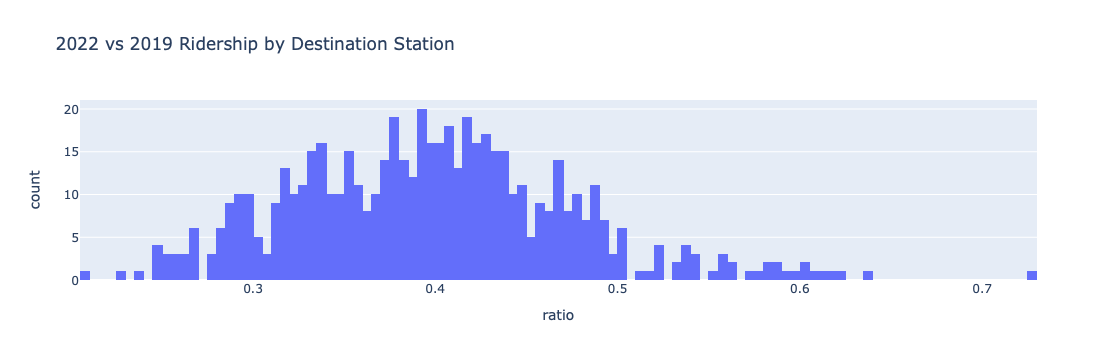

In [478]:
import plotly.graph_objects as go
orig = px.histogram(destination_stations, x="ratio", nbins=120, title = "2022 vs 2019 Ridership by Destination Station")
orig.show()

In [471]:
origin_stations['Type'] = 'Origin Station'
origin_stations.rename(columns={'Origin Station':'Station','Trip Count_2019':'2019: Num of Trips','Trip Count_2022':'2022: Num of Trips'})
# destination_stations['Type'] = 'Destination Station'
# destination_stations
# origin_stations
stations = pd.concat([origin_stations.rename(columns={
    'Origin Station':'Station','Trip Count_2019':'2019: Num of Trips','Trip Count_2022':'2022: Num of Trips'}),
                      destination_stations.rename(columns={'Destination Station':'Station','Trip Count_2019':'2019: Num of Trips','Trip Count_2022':'2022: Num of Trips'})], axis = 0)

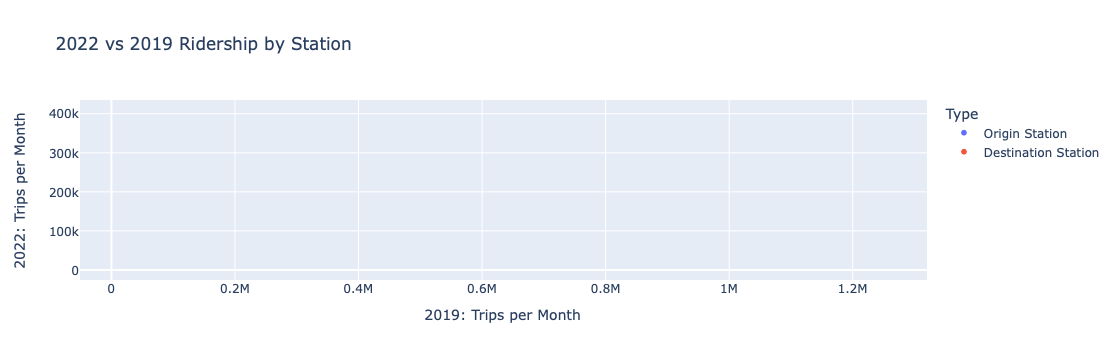

In [484]:
origin_scat = px.scatter(stations, 
                         x="2019: Num of Trips", 
                         y="2022: Num of Trips", 
                         labels={"2019: Num of Trips":"2019: Trips per Month","2022: Num of Trips":"2022: Trips per Month"},
                         trendline="ols", 
                         color = 'Type',
                         hover_data=["Station","Month"],
                         title = "2022 vs 2019 Ridership by Station")
origin_scat.show()

### Station Ranks

In [561]:
tester = origin_stations.groupby('Origin Station')[['Trip Count_2019','Trip Count_2022']].mean()\
[['Trip Count_2019','Trip Count_2022']].round().astype('int')
tester['2019 Rank'] = tester['Trip Count_2019'].rank(ascending = False).astype('int')
tester['2022 Rank'] = tester['Trip Count_2022'].rank(ascending = False).astype('int')
station_rank = tester.sort_values(by='2019 Rank').rename(columns = {'Trip Count_2019':'2019 Avg Monthly Trips',
                                                     'Trip Count_2022':'2022 Avg Monthly Trips'})
station_rank
station_rank['Percentage'] = round(station_rank['2022 Avg Monthly Trips'] / station_rank['2019 Avg Monthly Trips'] * 100,0)
station_rank.head(10)

2019 Avg Monthly Trips  2022 Avg Monthly Trips  2019 Rank  \
Origin Station                                                              
MONT                            954394                  252415          1   
EMBR                            947990                  317340          2   
POWL                            771261                  321094          3   
CIVC                            593948                  219252          4   
16TH                            324680                  134290          5   
19TH                            320627                  102744          6   
12TH                            320442                  106606          7   
24TH                            310797                  129592          8   
DBRK                            273844                  126269          9   
BALB                            273030                   99602         10   

                2022 Rank  Percentage  
Origin Station                         
MONT                    3        26.0  
EMBR                    2        33.0  
POWL                    1        42.0  
CIVC                    4        37.0  
16TH                    5        41.0  
19TH                   10        32.0  
12TH                    9        33.0  
24TH                    6        42.0  
DBRK                    7        46.0  
BALB                   11        36.0

In [563]:
destination_tester = destination_stations.groupby('Destination Station')[['Trip Count_2019','Trip Count_2022']].mean()\
[['Trip Count_2019','Trip Count_2022']].round().astype('int')
destination_tester['2019 Rank'] = destination_tester['Trip Count_2019'].rank(ascending = False).astype('int')
destination_tester['2022 Rank'] = destination_tester['Trip Count_2022'].rank(ascending = False).astype('int')
des_station_rank = destination_tester.sort_values(by='2019 Rank').rename(columns = {'Trip Count_2019':'2019 Avg Monthly Trips',
                                                     'Trip Count_2022':'2022 Avg Monthly Trips'})
des_station_rank
des_station_rank['Percentage'] = round(des_station_rank['2022 Avg Monthly Trips'] / des_station_rank['2019 Avg Monthly Trips'] * 100,0)
des_station_rank.head(10)

2019 Avg Monthly Trips  2022 Avg Monthly Trips  \
Destination Station                                                   
EMBR                                1121678                  361510   
MONT                                1026270                  295459   
POWL                                 675052                  284790   
CIVC                                 555449                  206594   
12TH                                 326168                  104950   
16TH                                 320276                  135845   
19TH                                 317481                  100446   
24TH                                 300384                  129701   
DBRK                                 288302                  128440   
BALB                                 240583                   90998   

                     2019 Rank  2022 Rank  Percentage  
Destination Station                                    
EMBR                         1          1        32.0  
MONT                         2          2        29.0  
POWL                         3          3        42.0  
CIVC                         4          4        37.0  
12TH                         5          8        32.0  
16TH                         6          5        42.0  
19TH                         7         10        32.0  
24TH                         8          6        43.0  
DBRK                         9          7        45.0  
BALB                        10         12        38.0

### Downtown Deep Dive

In [238]:
SF_downton = ['EMBR','MONT','POWL','CIVC']
downtown_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()
    df['Day Num'] = df['Date'].dt.dayofweek
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df = df[(df['Origin Station'].isin(SF_downton)) | (df['Destination Station'].isin(SF_downton))]
    df['Commute'] = df['Hour'].apply(lambda x: 'AM' if 4 < x <13 else 'PM')
    df['Origin_SF'] = df['Origin Station'].apply(SF)
    df['Destination_SF'] = df['Destination Station'].apply(SF)
    df['Transbay'] = df['Origin_SF'] + df['Destination_SF']
    df['Transbay'] = df['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')
    downtown_summary.append(df)

NameError: name 'SF' is not defined

In [778]:
downtown_master = pd.concat([downtown_summary[0],downtown_summary[1][downtown_summary[1]['Month']>4], downtown_summary[2][downtown_summary[2]['Month']<5]])

In [780]:
downtown_master.loc[downtown_master['Year'].isin([2022,2023]),'Year']= 2022

In [781]:
downtown_master

Date  Hour Origin Station Destination Station  Trip Count  \
4       2019-01-01     0           12TH                CIVC           2   
10      2019-01-01     0           12TH                EMBR           7   
20      2019-01-01     0           12TH                POWL           5   
33      2019-01-01     0           16TH                CIVC          10   
40      2019-01-01     0           16TH                EMBR          22   
...            ...   ...            ...                 ...         ...   
2815961 2023-05-02    23           WDUB                CIVC           1   
2815965 2023-05-02    23           WDUB                POWL           1   
2815970 2023-05-02    23           WOAK                CIVC           3   
2815975 2023-05-02    23           WOAK                MONT           2   
2815978 2023-05-02    23           WOAK                POWL           3   

         Month      Day  Day Num Month Name  Year Commute  Origin_SF  \
4            1  Tuesday        1    January  2019      PM          0   
10           1  Tuesday        1    January  2019      PM          0   
20           1  Tuesday        1    January  2019      PM          0   
33           1  Tuesday        1    January  2019      PM          1   
40           1  Tuesday        1    January  2019      PM          1   
...        ...      ...      ...        ...   ...     ...        ...   
2815961      5  Tuesday        1        May  2022      PM          0   
2815965      5  Tuesday        1        May  2022      PM          0   
2815970      5  Tuesday        1        May  2022      PM          0   
2815975      5  Tuesday        1        May  2022      PM          0   
2815978      5  Tuesday        1        May  2022      PM          0   

         Destination_SF Transbay  
4                     1        Y  
10                    1        Y  
20                    1        Y  
33                    1        N  
40                    1        N  
...                 ...      ...  
2815961               1        Y  
2815965               1        Y  
2815970               1        Y  
2815975               1        Y  
2815978               1        Y  

[4498106 rows x 14 columns]

In [805]:
alt = downtown_master[downtown_master['Destination Station'].isin(SF_downton)].groupby(
    ['Year','Day Num','Day','Date','Commute'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Day Num','Day','Commute'])['Trip Count'].mean().round().reset_index()
alt

Year  Day Num        Day Commute  Trip Count
0   2019        0     Monday      AM    105606.0
1   2019        0     Monday      PM     24990.0
2   2019        1    Tuesday      AM    114579.0
3   2019        1    Tuesday      PM     28641.0
4   2019        2  Wednesday      AM    114866.0
5   2019        2  Wednesday      PM     29283.0
6   2019        3   Thursday      AM    111747.0
7   2019        3   Thursday      PM     31234.0
8   2019        4     Friday      AM     98529.0
9   2019        4     Friday      PM     33476.0
10  2019        5   Saturday      AM     23458.0
11  2019        5   Saturday      PM     27294.0
12  2019        6     Sunday      AM     14995.0
13  2019        6     Sunday      PM     18190.0
14  2022        0     Monday      AM     27377.0
15  2022        0     Monday      PM     10385.0
16  2022        1    Tuesday      AM     36710.0
17  2022        1    Tuesday      PM     12046.0
18  2022        2  Wednesday      AM     36695.0
19  2022        2  Wednesday      PM     12402.0
20  2022        3   Thursday      AM     34949.0
21  2022        3   Thursday      PM     13405.0
22  2022        4     Friday      AM     24769.0
23  2022        4     Friday      PM     14903.0
24  2022        5   Saturday      AM     11611.0
25  2022        5   Saturday      PM     13874.0
26  2022        6     Sunday      AM      8099.0
27  2022        6     Sunday      PM      9698.0

In [806]:
AM_commute = downtown_master[downtown_master['Destination Station'].isin(SF_downton)].groupby(
    ['Year','Day Num','Day','Commute'])['Trip Count'].mean().reset_index()AM_commute

SyntaxError: invalid syntax (1043025506.py, line 2)

In [813]:
AM_commute #Total trips per Commute Period

Year  Day Num        Day Commute  Trip Count
0   2019        0     Monday      AM     5491532
1   2019        0     Monday      PM     1299474
2   2019        1    Tuesday      AM     6072669
3   2019        1    Tuesday      PM     1517993
4   2019        2  Wednesday      AM     5973042
5   2019        2  Wednesday      PM     1522698
6   2019        3   Thursday      AM     5810841
7   2019        3   Thursday      PM     1624187
8   2019        4     Friday      AM     5123523
9   2019        4     Friday      PM     1740729
10  2019        5   Saturday      AM     1219820
11  2019        5   Saturday      PM     1419262
12  2019        6     Sunday      AM      779756
13  2019        6     Sunday      PM      945875
14  2022        0     Monday      AM     1314114
15  2022        0     Monday      PM      498483
16  2022        1    Tuesday      AM     1762057
17  2022        1    Tuesday      PM      578219
18  2022        2  Wednesday      AM     1761342
19  2022        2  Wednesday      PM      595284
20  2022        3   Thursday      AM     1677567
21  2022        3   Thursday      PM      643428
22  2022        4     Friday      AM     1188906
23  2022        4     Friday      PM      715360
24  2022        5   Saturday      AM      557345
25  2022        5   Saturday      PM      665953
26  2022        6     Sunday      AM      388742
27  2022        6     Sunday      PM      465490

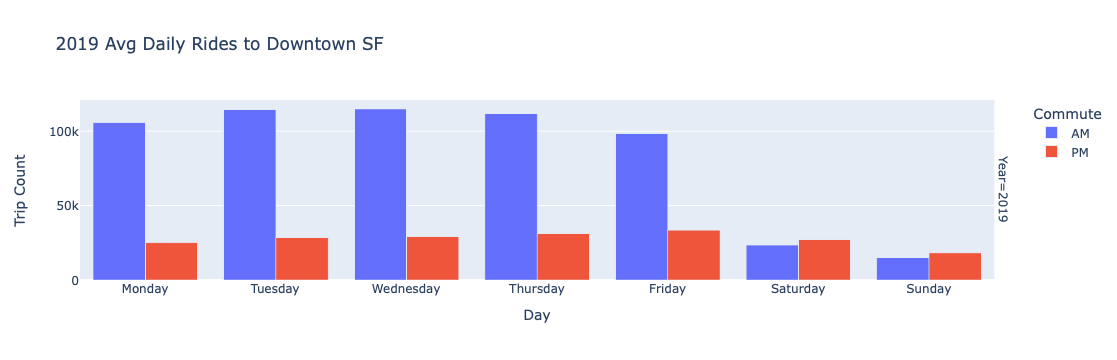

In [828]:
# AM_commute_2019 = AM_commute[AM_commute['Year']==2019]
# AM_commute_2019
# com2019 = px.bar(AM_commute_2019, x = "Day", y = "Trip Count", color = 'Commute', barmode = 'group')
# com2019.show()

AM_commute_2019 = AM_commute[AM_commute['Year']==2019]
AM_commute_2019
com2019 = px.bar(alt[alt['Year']==2019], x = "Day", y = "Trip Count", color = 'Commute', barmode = 'group',facet_row="Year", title = "2019 Avg Daily Rides to Downtown SF")
com2019.show()

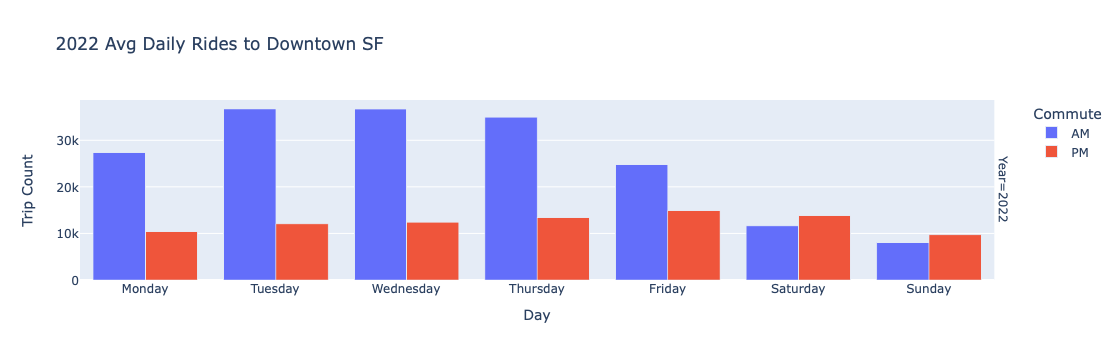

In [830]:
com2022 = px.bar(alt[alt['Year']==2022], x = "Day", y = "Trip Count", color = 'Commute', barmode = 'group',facet_row="Year", title = "2022 Avg Daily Rides to Downtown SF")
com2022.show()

In [764]:


new = px.bar(AM_commmute, x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "new", color = 'Commute', barmode = 'stacked')

# month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
#              y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
#              title = "Drop in Ridership: 2019 to 2023", color = 'Year')
# month.update_xaxes(showticklabels=False)
# month.add_annotation(
#     x="March 2020", y = 4000000,
#     text="March 2020",
#     showarrow=True,
#     xanchor="left")
# #month.add_hline(y=10008025)
new.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'barmode' property of layout
        Received value: 'stacked'

    The 'barmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['stack', 'group', 'overlay', 'relative']

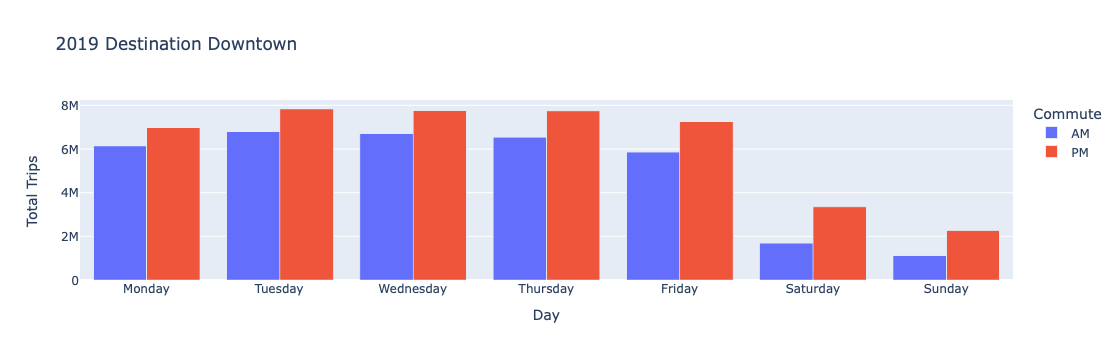

In [759]:
day_chart = px.bar(AM_commmute[AM_commmute['Year'] == 2019], x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "2019 Destination Downtown", color = 'Commute', barmode = 'group')

# month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
#              y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
#              title = "Drop in Ridership: 2019 to 2023", color = 'Year')
# month.update_xaxes(showticklabels=False)
# month.add_annotation(
#     x="March 2020", y = 4000000,
#     text="March 2020",
#     showarrow=True,
#     xanchor="left")
# #month.add_hline(y=10008025)
day_chart.show()

In [667]:
downtown_master

Date  Hour Origin Station Destination Station  Trip Count  \
4       2019-01-01     0           12TH                CIVC           2   
10      2019-01-01     0           12TH                EMBR           7   
20      2019-01-01     0           12TH                POWL           5   
33      2019-01-01     0           16TH                CIVC          10   
40      2019-01-01     0           16TH                EMBR          22   
...            ...   ...            ...                 ...         ...   
2815961 2023-05-02    23           WDUB                CIVC           1   
2815965 2023-05-02    23           WDUB                POWL           1   
2815970 2023-05-02    23           WOAK                CIVC           3   
2815975 2023-05-02    23           WOAK                MONT           2   
2815978 2023-05-02    23           WOAK                POWL           3   

         Month      Day  Day Num Month Name  Year Commute  Origin_SF  \
4            1  Tuesday        1    January  2019      AM          0   
10           1  Tuesday        1    January  2019      AM          0   
20           1  Tuesday        1    January  2019      AM          0   
33           1  Tuesday        1    January  2019      AM          1   
40           1  Tuesday        1    January  2019      AM          1   
...        ...      ...      ...        ...   ...     ...        ...   
2815961      5  Tuesday        1        May  2023      PM          0   
2815965      5  Tuesday        1        May  2023      PM          0   
2815970      5  Tuesday        1        May  2023      PM          0   
2815975      5  Tuesday        1        May  2023      PM          0   
2815978      5  Tuesday        1        May  2023      PM          0   

         Destination_SF Transbay  
4                     1        Y  
10                    1        Y  
20                    1        Y  
33                    1        N  
40                    1        N  
...                 ...      ...  
2815961               1        Y  
2815965               1        Y  
2815970               1        Y  
2815975               1        Y  
2815978               1        Y  

[4498106 rows x 14 columns]

In [647]:
bart2022 = pd.read_csv('date-hour-soo-dest-2022.csv')
bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
bart2022['Day'] = bart2022['Date'].dt.day_name()
bart2022['Day Num'] = bart2022['Date'].dt.dayofweek
bart2022['Month Name'] = bart2022['Date'].dt.month_name()
bart2022['Year'] = bart2022['Date'].dt.year

In [648]:
SF_downton = ['EMBR','MONT','POWL','CIVC']
bart2022 = bart2022[(bart2022['Origin Station'].isin(SF_downton)) | (bart2022['Destination Station'].isin(SF_downton))]

In [649]:
SF_stations = ['EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','DALY','COLM','SSAN','SBRN','SFIA','MLBR']

def SF(x):
    if x in SF_stations:
        return 1
    else:
        return 0

bart2022['Commute'] = bart2022['Hour'].apply(lambda x: 'AM' if x <13 else 'PM')
bart2022['Origin_SF'] = bart2022['Origin Station'].apply(SF)
bart2022['Destination_SF'] = bart2022['Destination Station'].apply(SF)
bart2022['Transbay'] = bart2022['Origin_SF'] + bart2022['Destination_SF']
bart2022['Transbay'] = bart2022['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')

In [720]:
bart2022

Date  Hour Origin Station Destination Station  Trip Count  \
4       2022-01-01     0           12TH                MONT           1   
5       2022-01-01     0           12TH                POWL           2   
12      2022-01-01     0           16TH                POWL           1   
23      2022-01-01     0           19TH                POWL           2   
31      2022-01-01     0           24TH                MONT           1   
...            ...   ...            ...                 ...         ...   
8245354 2022-12-31    23           WDUB                POWL           2   
8245360 2022-12-31    23           WOAK                CIVC           3   
8245362 2022-12-31    23           WOAK                EMBR          14   
8245367 2022-12-31    23           WOAK                MONT           2   
8245368 2022-12-31    23           WOAK                POWL           9   

         Month       Day  Day Num Month Name  Year Commute  Origin_SF  \
4            1  Saturday        5    January  2022      AM          0   
5            1  Saturday        5    January  2022      AM          0   
12           1  Saturday        5    January  2022      AM          1   
23           1  Saturday        5    January  2022      AM          0   
31           1  Saturday        5    January  2022      AM          1   
...        ...       ...      ...        ...   ...     ...        ...   
8245354     12  Saturday        5   December  2022      PM          0   
8245360     12  Saturday        5   December  2022      PM          0   
8245362     12  Saturday        5   December  2022      PM          0   
8245367     12  Saturday        5   December  2022      PM          0   
8245368     12  Saturday        5   December  2022      PM          0   

         Destination_SF Transbay  
4                     1        Y  
5                     1        Y  
12                    1        N  
23                    1        Y  
31                    1        N  
...                 ...      ...  
8245354               1        Y  
8245360               1        Y  
8245362               1        Y  
8245367               1        Y  
8245368               1        Y  

[2233471 rows x 14 columns]

In [727]:
downtown_summary[1][downtown_summary[1]['Destination Station']\
.isin(SF_downton)].groupby(['Day Num','Day','Commute'])['Trip Count'].sum().reset_index()

Day Num        Day Commute  Trip Count
0         0     Monday      AM     1285033
1         0     Monday      PM      491341
2         1    Tuesday      AM     1651638
3         1    Tuesday      PM      569551
4         2  Wednesday      AM     1683852
5         2  Wednesday      PM      587084
6         3   Thursday      AM     1598924
7         3   Thursday      PM      627307
8         4     Friday      AM     1210733
9         4     Friday      PM      713855
10        5   Saturday      AM      582105
11        5   Saturday      PM      668704
12        6     Sunday      AM      401659
13        6     Sunday      PM      455158

In [728]:
day = bart2022[bart2022['Destination Station'].isin(SF_downton)].groupby(['Day Num','Day','Commute'])['Trip Count'].sum().reset_index()

In [729]:
day

Day Num        Day Commute  Trip Count
0         0     Monday      AM     1285033
1         0     Monday      PM      491341
2         1    Tuesday      AM     1651638
3         1    Tuesday      PM      569551
4         2  Wednesday      AM     1683852
5         2  Wednesday      PM      587084
6         3   Thursday      AM     1598924
7         3   Thursday      PM      627307
8         4     Friday      AM     1210733
9         4     Friday      PM      713855
10        5   Saturday      AM      582105
11        5   Saturday      PM      668704
12        6     Sunday      AM      401659
13        6     Sunday      PM      455158

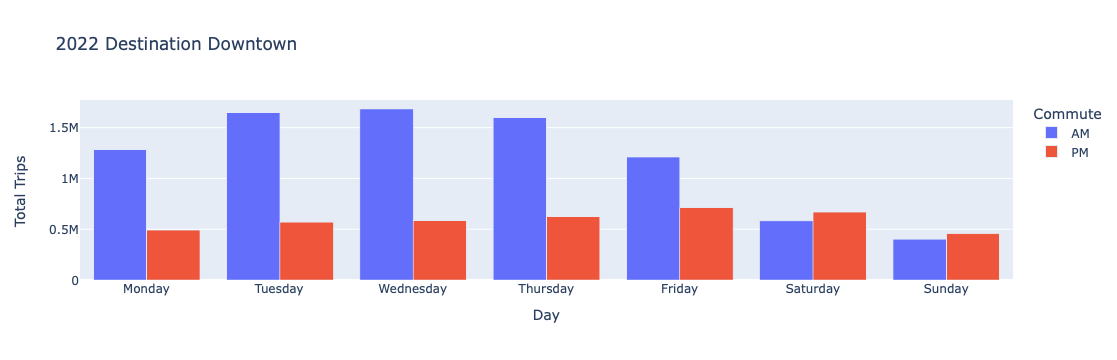

In [656]:
day_chart = px.bar(day, x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "2022 Destination Downtown", color = 'Commute', barmode = 'group')

# month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
#              y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
#              title = "Drop in Ridership: 2019 to 2023", color = 'Year')
# month.update_xaxes(showticklabels=False)
# month.add_annotation(
#     x="March 2020", y = 4000000,
#     text="March 2020",
#     showarrow=True,
#     xanchor="left")
# #month.add_hline(y=10008025)
day_chart.show()

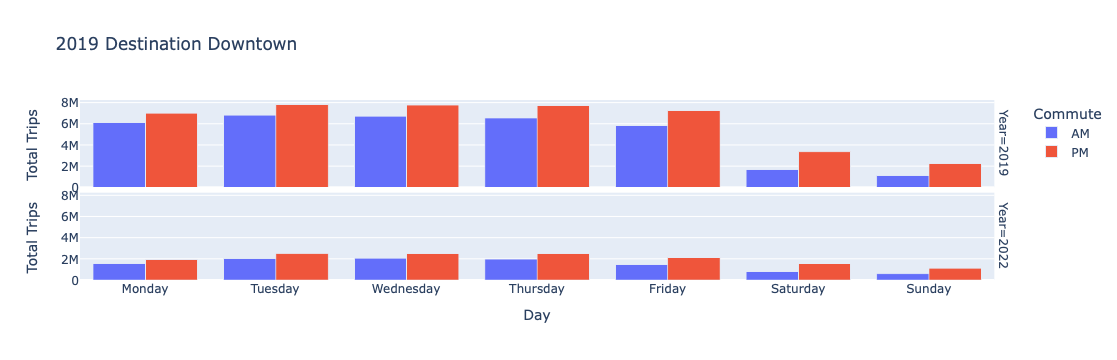

In [718]:
day_facet = px.bar(AM_commmute, x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "2019 Destination Downtown", color = 'Commute', barmode = 'group', facet_row="Year")
day_facet.show()

In [302]:
station_summary[0][(station_summary[0]['Month'] == 7)]

Year Month Name  Month Origin Station  Trip Count
288  2019       July      7           12TH      327809
289  2019       July      7           16TH      331603
290  2019       July      7           19TH      324870
291  2019       July      7           24TH      311225
292  2019       July      7           ANTC       71149
293  2019       July      7           ASHB      128142
294  2019       July      7           BALB      267678
295  2019       July      7           BAYF      131022
296  2019       July      7           BERY          40
297  2019       July      7           CAST       70198
298  2019       July      7           CIVC      600342
299  2019       July      7           COLM      105744
300  2019       July      7           COLS      160536
301  2019       July      7           CONC      135468
302  2019       July      7           DALY      213985
303  2019       July      7           DBRK      299434
304  2019       July      7           DELN      186545
305  2019       July      7           DUBL      212367
306  2019       July      7           EMBR     1014723
307  2019       July      7           FRMT      143371
308  2019       July      7           FTVL      192490
309  2019       July      7           GLEN      190792
310  2019       July      7           HAYW      108281
311  2019       July      7           LAFY       85692
312  2019       July      7           LAKE      174230
313  2019       July      7           MCAR      215110
314  2019       July      7           MLBR      160423
315  2019       July      7           MLPT          37
316  2019       July      7           MONT      990014
317  2019       July      7           NBRK      104799
318  2019       July      7           NCON       48145
319  2019       July      7           OAKL       37402
320  2019       July      7           ORIN       71687
321  2019       July      7           PCTR       31153
322  2019       July      7           PHIL      179671
323  2019       July      7           PITT       94304
324  2019       July      7           PLZA      114527
325  2019       July      7           POWL      775517
326  2019       July      7           RICH      112889
327  2019       July      7           ROCK      135275
328  2019       July      7           SANL      150613
329  2019       July      7           SBRN       88391
330  2019       July      7           SFIA      208117
331  2019       July      7           SHAY       73901
332  2019       July      7           SSAN       82948
333  2019       July      7           UCTY      118096
334  2019       July      7           WARM      110846
335  2019       July      7           WCRK      158035
336  2019       July      7           WDUB       86626
337  2019       July      7           WOAK      197835

In [257]:
bart2022.tail()

Date  Hour Origin Station Destination Station  Trip Count  \
8245365 2022-12-31    23           WOAK                MCAR           1   
8245366 2022-12-31    23           WOAK                MLBR           1   
8245367 2022-12-31    23           WOAK                MONT           2   
8245368 2022-12-31    23           WOAK                POWL           9   
8245369 2022-12-31    23           WOAK                SBRN           1   

         Month  Year  Day Month Name  
8245365     12  2022    5   December  
8245366     12  2022    5   December  
8245367     12  2022    5   December  
8245368     12  2022    5   December  
8245369     12  2022    5   December

In [15]:
bart2022 = pd.read_csv('date-hour-soo-dest-2022.csv')

In [253]:
datetime_object = datetime.strptime('05/31/22', '%m/%d/%y')
datetime_object

datetime.datetime(2022, 5, 31, 0, 0)

In [245]:
bart2022 = bart2022[bart2022['Date'] > datetime_object]

In [246]:
bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
bart2022['Month Name'] = bart2022['Date'].dt.month_name()
bart2022['Year'] = bart2022['Date'].dt.year

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_26387/4187686014.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_26387/4187686014.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_26387/4187686014.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [248]:
bart2022.groupby('Origin Station')['Trip Count'].sum()
bart2022.groupby('Destination Station')['Trip Count'].sum()

Destination Station
12TH     731145
16TH     955629
19TH     688915
24TH     903415
ANTC     289059
ASHB     305679
BALB     638943
BAYF     427782
BERY     224167
CAST     189401
CIVC    1472803
COLM     261040
COLS     480703
CONC     376969
DALY     709604
DBRK     904427
DELN     599486
DUBL     445184
EMBR    2570784
FRMT     294266
FTVL     635968
GLEN     486007
HAYW     344686
LAFY     220971
LAKE     506164
MCAR     582873
MLBR     335212
MLPT     179089
MONT    2069653
NBRK     275819
NCON      98659
OAKL     135073
ORIN     170453
PCTR      92725
PHIL     358608
PITT     292779
PLZA     326106
POWL    2032631
RICH     369416
ROCK     362762
SANL     492598
SBRN     244105
SFIA     691696
SHAY     221374
SSAN     216521
UCTY     270249
WARM     185831
WCRK     403158
WDUB     190099
WOAK     543913
Name: Trip Count, dtype: int64

In [17]:
#Features

#Datetime

bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
bart2022['Year'] = bart2022['Date'].dt.year
#bart2022['Week'] = bart2022['Date'].dt.week
# sample['Year'] = sample['Date'].dt.year
#bart2022['Day'] = bart2022['Date'].dt.dayofweek

Date  Hour Origin Station Destination Station  Trip Count  \
0       2022-01-01     0           12TH                12TH           1   
1       2022-01-01     0           12TH                16TH           1   
2       2022-01-01     0           12TH                24TH           2   
3       2022-01-01     0           12TH                ASHB           1   
4       2022-01-01     0           12TH                MONT           1   
...            ...   ...            ...                 ...         ...   
8245365 2022-12-31    23           WOAK                MCAR           1   
8245366 2022-12-31    23           WOAK                MLBR           1   
8245367 2022-12-31    23           WOAK                MONT           2   
8245368 2022-12-31    23           WOAK                POWL           9   
8245369 2022-12-31    23           WOAK                SBRN           1   

         Month  Year  Day  
0            1  2022    5  
1            1  2022    5  
2            1  2022    5  
3            1  2022    5  
4            1  2022    5  
...        ...   ...  ...  
8245365     12  2022    5  
8245366     12  2022    5  
8245367     12  2022    5  
8245368     12  2022    5  
8245369     12  2022    5  

[8245370 rows x 8 columns]

In [33]:
bart2022.groupby(['Year','Month'])['Trip Count'].sum().reset_index()

Year  Month  Trip Count
0   2022      1     2220863
1   2022      2     2558265
2   2022      3     3388485
3   2022      4     3421101
4   2022      5     3593434
5   2022      6     3800420
6   2022      7     3493579
7   2022      8     3991651
8   2022      9     4180197
9   2022     10     4187488
10  2022     11     3747639
11  2022     12     3403625

In [23]:
master = []
#master[0] = bart2022.groupby('Month')['Trip Count'].sum().reset_index()

In [34]:
master.append(bart2022.groupby(['Year','Month'])['Trip Count'].sum().reset_index())

In [35]:
master

[    Month  Trip Count
 0       1     2220863
 1       2     2558265
 2       3     3388485
 3       4     3421101
 4       5     3593434
 5       6     3800420
 6       7     3493579
 7       8     3991651
 8       9     4180197
 9      10     4187488
 10     11     3747639
 11     12     3403625,
     Month  Trip Count
 0       1     2220863
 1       2     2558265
 2       3     3388485
 3       4     3421101
 4       5     3593434
 5       6     3800420
 6       7     3493579
 7       8     3991651
 8       9     4180197
 9      10     4187488
 10     11     3747639
 11     12     3403625,
     Year  Month  Trip Count
 0   2022      1     2220863
 1   2022      2     2558265
 2   2022      3     3388485
 3   2022      4     3421101
 4   2022      5     3593434
 5   2022      6     3800420
 6   2022      7     3493579
 7   2022      8     3991651
 8   2022      9     4180197
 9   2022     10     4187488
 10  2022     11     3747639
 11  2022     12     3403625]

In [30]:
df = pd.concat(master)
df

Month  Trip Count
0       1     2220863
1       2     2558265
2       3     3388485
3       4     3421101
4       5     3593434
5       6     3800420
6       7     3493579
7       8     3991651
8       9     4180197
9      10     4187488
10     11     3747639
11     12     3403625
0       1     2220863
1       2     2558265
2       3     3388485
3       4     3421101
4       5     3593434
5       6     3800420
6       7     3493579
7       8     3991651
8       9     4180197
9      10     4187488
10     11     3747639
11     12     3403625

1

In [28]:
bart2022['Origin_SF'] = bart2022['Origin Station'].apply(SF)
bart2022['Destination_SF'] = bart2022['Destination Station'].apply(SF)
bart2022['Direction'] = (bart2022['Origin_SF']) - bart2022['Destination_SF']

In [29]:
bart2022

level_0    index       Date  Hour Origin Station Destination Station  \
0              0        0 2022-01-01     0           12TH                12TH   
1              1        1 2022-01-01     0           12TH                16TH   
2              2        2 2022-01-01     0           12TH                24TH   
3              3        3 2022-01-01     0           12TH                ASHB   
4              4        4 2022-01-01     0           12TH                MONT   
...          ...      ...        ...   ...            ...                 ...   
8245365  8245365  8245365 2022-12-31    23           WOAK                MCAR   
8245366  8245366  8245366 2022-12-31    23           WOAK                MLBR   
8245367  8245367  8245367 2022-12-31    23           WOAK                MONT   
8245368  8245368  8245368 2022-12-31    23           WOAK                POWL   
8245369  8245369  8245369 2022-12-31    23           WOAK                SBRN   

         Trip Count  Month  Day  Origin_SF  Destination_SF  Direction  
0                 1      1    5          0               0          0  
1                 1      1    5          0               1         -1  
2                 2      1    5          0               1         -1  
3                 1      1    5          0               0          0  
4                 1      1    5          0               1         -1  
...             ...    ...  ...        ...             ...        ...  
8245365           1     12    5          0               0          0  
8245366           1     12    5          0               1         -1  
8245367           2     12    5          0               1         -1  
8245368           9     12    5          0               1         -1  
8245369           1     12    5          0               1         -1  

[8245370 rows x 12 columns]

In [32]:
print(str(bart2022['Direction'].sum()) + ' more trips leaving SF than entering SF over the course of 2022.')
bart2022['Direction'].sum()

53190 more trips leaving SF than entering SF over the course of 2022.


53190

In [41]:
bart2022[(bart2022['Hour'] >= 0) & (bart2022['Hour'] <=12)]['Direction'].sum()
commute = bart2022[(bart2022['Hour'] >= 0) & (bart2022['Hour'] <=12)].groupby(['Day'])['Direction'].sum(
    ).reset_index().rename(columns={'Direction':'Morning Activity'})
commute['Afternoon Activity'] = bart2022[(bart2022['Hour'] > 12) & (bart2022['Hour'] <24)].groupby(['Day'])['Direction'].sum(
    )
print('Negative values reflect East Bay to SF directionality. Positive values show SF to East Bay directionality.')
commute

Negative values reflect East Bay to SF directionality. Positive values show SF to East Bay directionality.


Day  Morning Activity  Afternoon Activity
0    0            -33278               38250
1    1            -35007               42513
2    2            -34799               42771
3    3            -32649               41416
4    4            -30460               33878
5    5            -10829               19063
6    6              -465               12786

<Axes: >

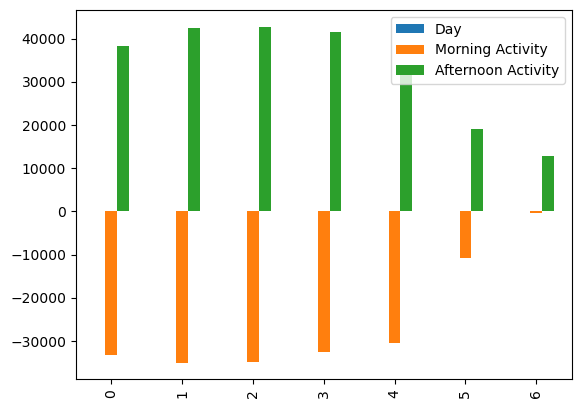

In [43]:
commute.plot.bar()

In [38]:
bart2022[(bart2022['Hour'] > 12) & (bart2022['Hour'] <24)].groupby(['Day'])['Direction'].sum(
    )#.reset_index()

Day
0    38250
1    42513
2    42771
3    41416
4    33878
5    19063
6    12786
Name: Direction, dtype: int64

<Axes: xlabel='Month'>

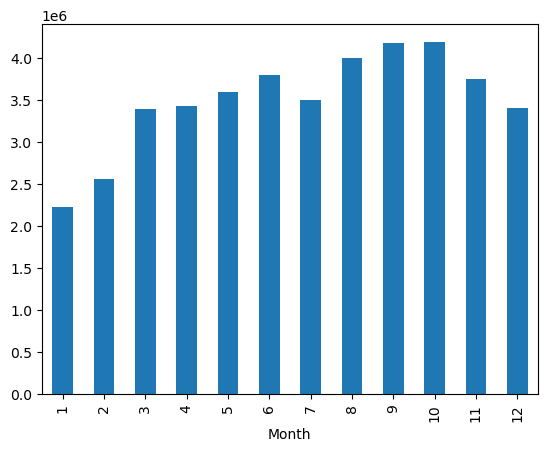

In [17]:
bart2022.groupby('Month')['Trip Count'].sum().plot.bar()

<Axes: xlabel='Day'>

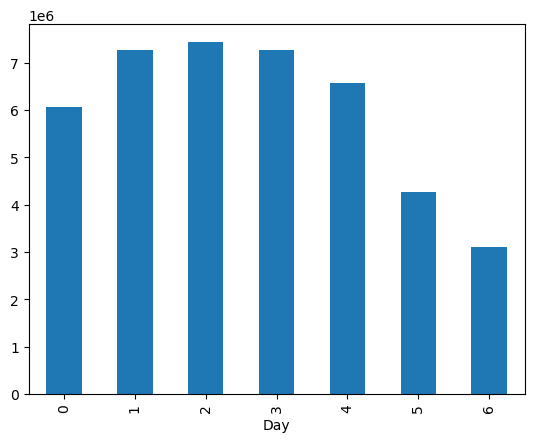

In [18]:
bart2022.groupby('Day')['Trip Count'].sum().plot.bar()

<Axes: xlabel='Origin Station'>

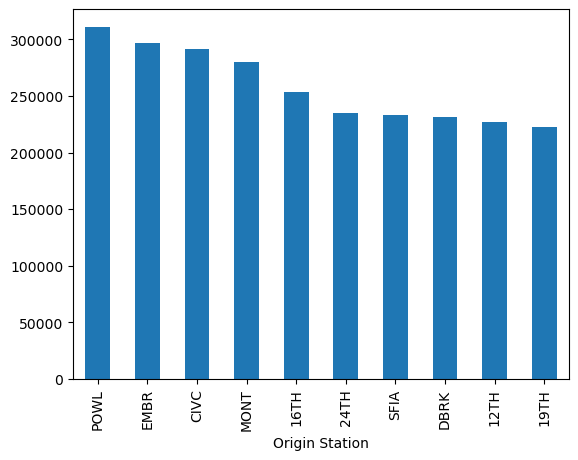

In [24]:
bart2022['Origin Station'].value_counts().plot.bar()
bart2022['Origin Station'].value_counts().head(10).plot.bar()

<Axes: xlabel='Destination Station'>

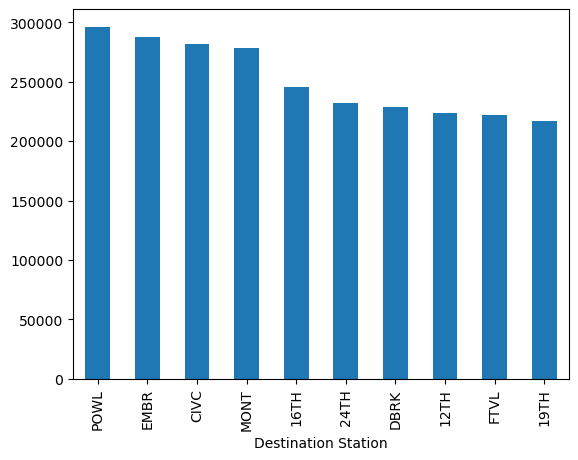

In [25]:
bart2022['Destination Station'].value_counts().plot.bar()
bart2022['Destination Station'].value_counts().head(10).plot.bar()

##### Import 2011 - 2023

In [6]:
test = list(range(2021,2024,1))

bart_summary = []
for i in test:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
#process within the loop
    bart = pd.concat([bart,df], axis = 0)
    bart_summary.append(#df)

pd.concat(bart_summary)
#summarize, concatenate and save the output as variable


In [46]:
bart2019 = pd.read_csv('date-hour-soo-dest-2019.csv')

In [47]:
bart2020 = pd.read_csv('date-hour-soo-dest-2020.csv')

In [48]:
bart2021 = pd.read_csv('date-hour-soo-dest-2021.csv')

In [49]:
bart2023 = pd.read_csv('date-hour-soo-dest-2023.csv')

In [51]:
bart19_23 = pd.concat([bart2019,bart2020,bart2021,bart2023], axis = 0)

In [57]:
bart19_23['Date'] = pd.to_datetime(bart19_23['Date'], format = '%Y-%m-%d')
bart19_23['Month'] = bart19_23['Date'].dt.month
bart19_23['Year'] = bart19_23['Date'].dt.year
bart19_23['Day'] = bart19_23['Date'].dt.dayofweek
bart19_23 = bart19_23.reset_index()
bart19_23

ValueError: cannot insert level_0, already exists

In [59]:
bart19_23['Year'] = bart19_23['Date'].dt.year
bart19_23

level_0    index       Date  Hour Origin Station  \
0                0        0 2019-01-01     0           12TH   
1                1        1 2019-01-01     0           12TH   
2                2        2 2019-01-01     0           12TH   
3                3        3 2019-01-01     0           12TH   
4                4        4 2019-01-01     0           12TH   
...            ...      ...        ...   ...            ...   
25340189  25340189  2815977 2023-05-02    23           WOAK   
25340190  25340190  2815978 2023-05-02    23           WOAK   
25340191  25340191  2815979 2023-05-02    23           WOAK   
25340192  25340192  2815980 2023-05-02    23           WOAK   
25340193  25340193  2815981 2023-05-02    23           WOAK   

         Destination Station  Trip Count  Month  Day  Year  
0                       12TH           3      1    1  2019  
1                       16TH           4      1    1  2019  
2                       ANTC           1      1    1  2019  
3                       BAYF           1      1    1  2019  
4                       CIVC           2      1    1  2019  
...                      ...         ...    ...  ...   ...  
25340189                PLZA           2      5    1  2023  
25340190                POWL           3      5    1  2023  
25340191                RICH           2      5    1  2023  
25340192                SANL           1      5    1  2023  
25340193                WCRK           2      5    1  2023  

[25340194 rows x 10 columns]

<Axes: xlabel='Year,Month'>

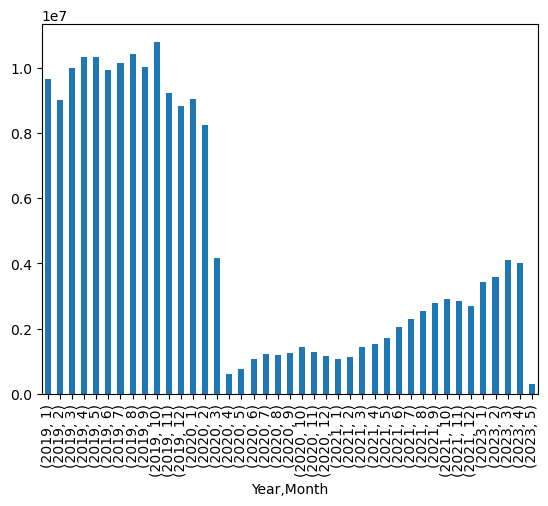

In [60]:
bart19_23.groupby(['Year','Month'])['Trip Count'].sum().plot.bar()

In [8]:
bart.isna().sum() # no missing data

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [9]:
print('Data is not missing values. First date in range: ' + str(bart['Date'].min()) + '. Last date in range: ' + str(bart['Date'].max()) + '. Total number of records: ' + str(bart.shape[0]))
print('There are ' + str(bart['Destination Station'].value_counts().shape[0]) + ' stations.')
print(str(bart[['Hour']].value_counts().shape[0]) + ' hours of origin represented, although not in every year.')

Data is not missing values. First date in range: 2011-01-01. Last date in range: 2023-05-02. Total number of records: 112536132
There are 50 stations.
24 hours of origin represented, although not in every year.


In [10]:
#Sample for Feature Engineering

random.seed(0)
sample = bart.sample(10)

In [146]:
print(sample['Date'].dtype)
sample[['Date']]
# sample['Date'].iloc[1]
sample


object


Date  Hour Origin Station Destination Station  Trip Count
3917712  2016-05-23     7           PLZA                FRMT           8
6967591  2011-09-25    23           COLS                BALB           1
6105753  2013-08-20     7           19TH                BAYF           7
5408197  2012-07-21    19           WCRK                COLS           2
8911885  2019-11-16    16           ROCK                DALY           1
43261    2021-01-05     8           FRMT                BAYF           2
6435302  2018-08-19    17           SANL                MONT          10
827947   2020-02-02     0           BAYF                DUBL           1
8592327  2019-11-05    12           NBRK                SFIA           9
2102337  2018-03-19    16           MCAR                NCON           5

In [147]:
sample['Date'].astype

<bound method NDFrame.astype of 3917712    2016-05-23
6967591    2011-09-25
6105753    2013-08-20
5408197    2012-07-21
8911885    2019-11-16
43261      2021-01-05
6435302    2018-08-19
827947     2020-02-02
8592327    2019-11-05
2102337    2018-03-19
Name: Date, dtype: object>

In [12]:
#Converting to datetime and extracting days week month.

sample['Date'] = pd.to_datetime(sample['Date'], format = '%Y-%m-%d')
sample['Date'].dtype
sample['Month'] = sample['Date'].dt.month
sample['Year'] = sample['Date'].dt.year
sample['Day'] = sample['Date'].dt.dayofweek
sample = sample.reset_index()
sample


level_0    index       Date  Hour Origin Station Destination Station  \
0        0  8695417 2018-11-06     6           PCTR                SFIA   
1        1  5138090 2013-07-15     9           MONT                DELN   
2        2   316182 2019-01-12    18           DELN                GLEN   
3        3  3721576 2017-05-18    19           DBRK                DALY   
4        4  7640532 2022-12-04    13           FRMT                BALB   
5        5  2207146 2019-03-22     6           COLS                DALY   
6        6  7216693 2013-09-29    10           UCTY                COLM   
7        7  1660711 2019-03-02    10           19TH                EMBR   
8        8  3561288 2021-08-08    21           MONT                RICH   
9        9  3756884 2018-05-18     6           CAST                DBRK   

   Trip Count  Month  Year  Day  
0           2     11  2018    1  
1          10      7  2013    0  
2           1      1  2019    5  
3           8      5  2017    3  
4           1     12  2022    6  
5           3      3  2019    4  
6           1      9  2013    6  
7          38      3  2019    5  
8           4      8  2021    6  
9           1      5  2018    4

In [ ]:
bart['Date'] = pd.to_datetime(bart['Date'], format = '%Y-%m-%d')
bart['Month'] = bart['Date'].dt.month
bart['Year'] = bart['Date'].dt.year
bart['Day'] = bart['Date'].dt.dayofweek
bart = bart.reset_index()
bart

In [167]:
#Basic Stats - Total trips per year, overall trend in ridership

sample.groupby('Year')['Trip Count'].sum().reset_index()
sample.groupby(['Year','Month'])['Trip Count'].sum().reset_index().sort_values(by='Month')


Year  Month  Trip Count
8  2021      1           2
7  2020      2           1
4  2018      3           5
3  2016      5           8
1  2012      7           2
2  2013      8           7
5  2018      8          10
0  2011      9           1
6  2019     11          10

In [173]:
#busiest stations
sample_trips = sample.groupby(['Origin Station'])['Trip Count'].sum().reset_index().sort_values(by='Origin Station').merge(
sample.groupby(['Destination Station'])['Trip Count'].sum().reset_index().sort_values(by='Destination Station'),how = "outer", left_on = "Origin Station",
right_on = 'Destination Station')
sample_trips['Total_Trips'] = sample_trips['Trip Count_x'] = sample_trips['Trip Count_y']
sample_trips


Origin Station  Trip Count_x Destination Station  Trip Count_y  Total_Trips
0            19TH           NaN                 NaN           NaN          NaN
1             NaN           1.0                BALB           1.0          1.0
2            BAYF           9.0                BAYF           9.0          9.0
3            COLS           2.0                COLS           2.0          2.0
4             NaN           1.0                DALY           1.0          1.0
5             NaN           1.0                DUBL           1.0          1.0
6            FRMT           8.0                FRMT           8.0          8.0
7            MCAR           NaN                 NaN           NaN          NaN
8             NaN          10.0                MONT          10.0         10.0
9            NBRK           NaN                 NaN           NaN          NaN
10            NaN           5.0                NCON           5.0          5.0
11           PLZA           NaN                 NaN           NaN          NaN
12           ROCK           NaN                 NaN           NaN          NaN
13           SANL           NaN                 NaN           NaN          NaN
14            NaN           9.0                SFIA           9.0          9.0
15           WCRK           NaN                 NaN           NaN          NaN

## Possible Questions:

1. Where should my client open their coffee chain? What are the highest traffic areas?
2. How where should I be increasing train cars and frequency of routes?
3. If we had to cut operating hours due to low ridership, which routes would we keep and when? 
4. Are there any good candidates for express trains? express services?
5. I want to place targeted ads in Bart -- which stations will give me the most exposure?

Over Time
1. What are the biggest trends in ridership? Any need to decrease routes?
2. What was the impact of Covid shelter in place on BART? How have we bounced back? 
3. Has ridership changed with the growth of with Uber and Lyft? What routes remain impervious?
4. If ridership has decreased over time, which statiosn are in need of revitalizing?

In [226]:
sample

index       Date  Hour Origin Station Destination Station  Trip Count  \
0  3917712 2016-05-23     7           PLZA                FRMT           8   
1  6967591 2011-09-25    23           COLS                BALB           1   
2  6105753 2013-08-20     7           19TH                BAYF           7   
3  5408197 2012-07-21    19           WCRK                COLS           2   
4  8911885 2019-11-16    16           ROCK                DALY           1   
5    43261 2021-01-05     8           FRMT                BAYF           2   
6  6435302 2018-08-19    17           SANL                MONT          10   
7   827947 2020-02-02     0           BAYF                DUBL           1   
8  8592327 2019-11-05    12           NBRK                SFIA           9   
9  2102337 2018-03-19    16           MCAR                NCON           5   

   Month  Year  Day  
0      5  2016    0  
1      9  2011    6  
2      8  2013    1  
3      7  2012    5  
4     11  2019    5  
5      1  2021    1  
6      8  2018    6  
7      2  2020    6  
8     11  2019    1  
9      3  2018    0

In [235]:
sample

index       Date  Hour Origin Station Destination Station  Trip Count  \
0  3917712 2016-05-23     7           PLZA                FRMT           8   
1  6967591 2011-09-25    23           COLS                BALB           1   
2  6105753 2013-08-20     7           19TH                BAYF           7   
3  5408197 2012-07-21    19           WCRK                COLS           2   
4  8911885 2019-11-16    16           ROCK                DALY           1   
5    43261 2021-01-05     8           FRMT                BAYF           2   
6  6435302 2018-08-19    17           SANL                MONT          10   
7   827947 2020-02-02     0           BAYF                DUBL           1   
8  8592327 2019-11-05    12           NBRK                SFIA           9   
9  2102337 2018-03-19    16           MCAR                NCON           5   

   Month  Year  Day  Origin_SF  Destination_SF  Direction  
0      5  2016    0          0               0          0  
1      9  2011    6          0               1         -1  
2      8  2013    1          0               0          0  
3      7  2012    5          0               0          0  
4     11  2019    5          0               1         -1  
5      1  2021    1          0               0          0  
6      8  2018    6          0               1         -1  
7      2  2020    6          0               0          0  
8     11  2019    1          0               1         -1  
9      3  2018    0          0               0          0

## Deprecated

In [236]:
stations
pass

In [207]:
red = pd.DataFrame([[1, '16',0],[2,'24',0],[3,'GP',1],[4,'BP',0]], columns=['Stop', 'Station', 'Transfer'])
red

blue = pd.DataFrame([[1, 'AA',0],[2,'BB',0],[3,'GP',1],[4,'DD',0]], columns=['Stop', 'Station', 'Transfer'])
blue.reset_index()

index  Stop Station  Transfer
0      0     1      AA         0
1      1     2      BB         0
2      2     3      GP         1
3      3     4      DD         0

In [214]:
red_single = ['16','BP']
if (red_single[0] in list(red['Station'])) & (red_single[1] in list(red['Station'])):
    print(abs(red.loc[red['Station'] == red_single[0]].index.tolist()[0]-red.loc[red['Station'] == red_single[1]].index.tolist()[0]))

3


In [209]:
red

Stop Station  Transfer
0     1      16         0
1     2      24         0
2     3      GP         1
3     4      BP         0

In [212]:
abs(red.loc[red['Station'] == 'BP'].index.tolist()[0]-red.loc[red['Station'] == '24'].index.tolist()[0])


2

In [205]:
'BP' in list(red['Station'])

True